In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
from numpy import nan
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import collections

%matplotlib inline
from matplotlib.pylab import rcParams

# function to read the csv file

In [2]:
def create_dataframe(filepath):
    test = pd.read_csv(filepath) # here the given csv file is reading
    return test

# filepath ='/home/atif/20_aug_1.csv'
filepath = '/home/atif/feb_march_1.csv'
# filepath = 'E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv'
# filepath ='/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv'
initial_dataframe = create_dataframe(filepath)

In [3]:
initial_dataframe.head()

Unnamed: 0       longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
0      140972  1554076740000     68.800616     38.813747     92.134679   
1      140973  1554076680000     71.799463     46.388546     91.813585   
2      140974  1554076620000     75.605381     52.711181     91.652279   
3      140975  1554076560000     79.815456     55.189602     91.813585   
4      140976  1554076500000     84.083045     53.624077     92.134679   

   AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  ...  \
0     31.640239     55.709343     89.382264     93.755293     25.978776  ...   
1     30.635985     55.709343     89.382264     93.714470     28.573610  ...   
2     28.395660     55.709343     89.543070     93.554214     32.076391  ...   
3     24.315098     55.709343     89.703875     93.373546     39.850956  ...   
4     18.810901     55.709343     89.865440     93.273011     42.819819  ...   

   RWWIHOUT10V1  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
0             0     83.568835     41.687065     37.582423     79.148815   
1             0     83.620740     41.687065     37.524301     79.092552   
2             0     83.409858     41.687065     38.396282     79.217239   
3             0     83.507147     41.687065     38.053879     79.300451   
4             0     83.333852     41.687065     37.687557     79.263014   

   RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  
0     75.633611     68.747738     66.438534      0.678688     12.421052  
1     75.611684     68.382080     66.390368      0.679430     11.903316  
2     75.957467     68.701091     66.307779      0.651073     11.880802  
3     75.887544     68.946430     66.447565      0.680147     12.199080  
4     75.596790     68.958650     67.158141      0.679950     11.737926  

[5 rows x 4240 columns]

In [4]:
initial_dataframe = initial_dataframe.drop(['Unnamed: 0'], axis=1)
initial_dataframe.head(2)

longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0  1554076740000     68.800616     38.813747     92.134679     31.640239   
1  1554076680000     71.799463     46.388546     91.813585     30.635985   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     55.709343     89.382264     93.755293     25.978776     72.473868  ...   
1     55.709343     89.382264     93.714470     28.573610     72.473868  ...   

   RWWIHOUT10V1  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
0             0     83.568835     41.687065     37.582423     79.148815   
1             0     83.620740     41.687065     37.524301     79.092552   

   RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  
0     75.633611     68.747738     66.438534      0.678688     12.421052  
1     75.611684     68.382080     66.390368      0.679430     11.903316  

[2 rows x 4239 columns]

# In this cell dateTime column will be made but will not set it up as index column

In [5]:
# function for converting timestamp to unixtime and return the ready dataframe

def conversion_timestamp_to_unixtime(initial_dataframe):
    ''' now conversion of timestamp to unixtime will start. In the csv file the column name of
    timestamp is longtime.'''
    
    longTime = initial_dataframe.loc[0:,['longTime']]
    longTime = longTime.as_matrix()
    a = []
    date_time_array = []
    for k in longTime:
        a = np.append(a,k)
    str_time = []
    correct_longtime = []
    datetime_time = []
    count = 0
    
    for b in a:
        b = int(b) # make plain integer
        str_b = str(b)
        c = str_b[-3:]
        new_str_b = str_b.replace(c, '',1)
        new_str_b_time = int(new_str_b)
        correct_longtime.append(new_str_b_time)
        now_time = datetime.datetime.fromtimestamp(new_str_b_time)
        convert_time = now_time.strftime('%Y-%m-%d %H:%M')
        str_time.append(convert_time)
    test_new = initial_dataframe.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added
    test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
    test_new = test_new.drop(['longTime','stringTime','correct_longtime'], axis=1)
    
    return test_new

test_new = conversion_timestamp_to_unixtime(initial_dataframe)

/home/atif/iai_ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
test_new.head()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0     68.800616     38.813747     92.134679     31.640239     55.709343   
1     71.799463     46.388546     91.813585     30.635985     55.709343   
2     75.605381     52.711181     91.652279     28.395660     55.709343   
3     79.815456     55.189602     91.813585     24.315098     55.709343   
4     84.083045     53.624077     92.134679     18.810901     55.709343   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     89.382264     93.755293     25.978776     72.473868     23.718322  ...   
1     89.382264     93.714470     28.573610     72.473868     23.557499  ...   
2     89.543070     93.554214     32.076391     72.009292     25.421545  ...   
3     89.703875     93.373546     39.850956     71.080139     21.091592  ...   
4     89.865440     93.273011     42.819819     70.615563     22.884975  ...   

   RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
0     83.568835     41.687065     37.582423     79.148815     75.633611   
1     83.620740     41.687065     37.524301     79.092552     75.611684   
2     83.409858     41.687065     38.396282     79.217239     75.957467   
3     83.507147     41.687065     38.053879     79.300451     75.887544   
4     83.333852     41.687065     37.687557     79.263014     75.596790   

   RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0            dateTime  
0     68.747738     66.438534      0.678688     12.421052 2019-04-01 01:59:00  
1     68.382080     66.390368      0.679430     11.903316 2019-04-01 01:58:00  
2     68.701091     66.307779      0.651073     11.880802 2019-04-01 01:57:00  
3     68.946430     66.447565      0.680147     12.199080 2019-04-01 01:56:00  
4     68.958650     67.158141      0.679950     11.737926 2019-04-01 01:55:00  

[5 rows x 4239 columns]

# look here in the previous cell if test.head() is printed then 'row ID' column will be appeared which is problematic. so, remove it.

In [7]:
if 1<0:
    test_new_1 = test_new.drop(['row ID'], axis = 1)
else:
    test_new_1 = test_new

In [8]:
test_new_1.head()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0     68.800616     38.813747     92.134679     31.640239     55.709343   
1     71.799463     46.388546     91.813585     30.635985     55.709343   
2     75.605381     52.711181     91.652279     28.395660     55.709343   
3     79.815456     55.189602     91.813585     24.315098     55.709343   
4     84.083045     53.624077     92.134679     18.810901     55.709343   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     89.382264     93.755293     25.978776     72.473868     23.718322  ...   
1     89.382264     93.714470     28.573610     72.473868     23.557499  ...   
2     89.543070     93.554214     32.076391     72.009292     25.421545  ...   
3     89.703875     93.373546     39.850956     71.080139     21.091592  ...   
4     89.865440     93.273011     42.819819     70.615563     22.884975  ...   

   RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
0     83.568835     41.687065     37.582423     79.148815     75.633611   
1     83.620740     41.687065     37.524301     79.092552     75.611684   
2     83.409858     41.687065     38.396282     79.217239     75.957467   
3     83.507147     41.687065     38.053879     79.300451     75.887544   
4     83.333852     41.687065     37.687557     79.263014     75.596790   

   RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0            dateTime  
0     68.747738     66.438534      0.678688     12.421052 2019-04-01 01:59:00  
1     68.382080     66.390368      0.679430     11.903316 2019-04-01 01:58:00  
2     68.701091     66.307779      0.651073     11.880802 2019-04-01 01:57:00  
3     68.946430     66.447565      0.680147     12.199080 2019-04-01 01:56:00  
4     68.958650     67.158141      0.679950     11.737926 2019-04-01 01:55:00  

[5 rows x 4239 columns]

In [9]:
print(test_new.shape)
print(test_new_1.shape)

(45128, 4239)
(45128, 4239)


In [10]:
# a = test_new.reset_index()
# b = test_new_1.reset_index()

In [11]:
# print(a.shape)
# print(b.shape)

In [12]:
# new_variable = []
# for i in test_new_1:
#     x = i[:2]
#     if x != 'RW':
#         new_variable = np.append(new_variable, i)

In [13]:
# new_variable.shape

In [14]:
# n = test_new_1.iloc[:][new_variable]
# n.shape

# Removing column whose name started with RW as they are calculated data instead of sensor's data

In [15]:
def remove_rw_column(dataframe):
    new_variable = []
    for i in dataframe:
        x = i[:2]
        if x != 'RW':
            new_variable = np.append(new_variable, i)
    return new_variable

In [16]:
var_new = remove_rw_column(test_new)

In [17]:
test_new_2 = test_new.iloc[:][var_new]

# be careful here , when perform on a dataframe reset_index then a new column will appear and it is 'index'. No need of it so immediately drop it. for better view please take a look in the previous cell

# Now it's time to alter the dataframe. This will oreder the dataframe in ascending prder with respect to dateTime

In [18]:
# here using test_new_1 as it has no row ID column and also no problematic value

def alter_time(dataframe, start_pos, end_pos):
#     multivariate_data=test_new.iloc[start_pos:end_pos][multivariate_column_label] # comment out this line if you pass column label
    dataframe=dataframe.iloc[start_pos:end_pos][:]
    dataframe=dataframe.loc[::-1]
    
    return dataframe

start_pos = 0
# end_pos = 25000
end_pos = 129600
multivariate_data = alter_time(test_new_2, start_pos, end_pos)
multivariate_data.head()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
45127     72.030143     28.019753     90.988125     25.369044     92.387543   
45126     72.030143     37.870419     90.988125     34.451579     88.177774   
45125     72.030143     37.539252     91.149431     28.288056     83.217843   
45124     72.491504     33.654575     91.149431     19.484082     78.546713   
45123     72.952865     31.004058     91.149431     13.651564     74.451979   

       AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  \
45127     90.208292     93.674403     10.971169     51.916376    100.000000   
45126     90.449495     93.353135     18.897334     51.451800     75.601790   
45125     90.611060     93.694815     21.669213     51.451800     88.131190   
45124     90.590588     93.353135     20.455251     50.987224     91.157527   
45123     90.993356     93.373546     16.226620     50.987224    100.000000   

       ...  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  AEWIHOCK__V9  \
45127  ...     94.822678     56.662746           0.0     59.076656   
45126  ...     94.806487     56.662746           0.0     59.186438   
45125  ...     94.804366     56.662746           0.0     59.348841   
45124  ...     94.866030     56.943046           0.0     58.551446   
45123  ...     94.857934     56.943046           0.0     58.921563   

       AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  AEWIHOAKVSV0  \
45127      63.49364     45.589686     30.354219             0     72.592791   
45126      63.49364     45.589686     30.333882             0     72.108628   
45125      63.49364     45.589686     30.896460             0     71.980585   
45124      63.49364     45.589686     30.998142             0     72.105027   
45123      63.49364     45.589686     30.770411             0     72.084620   

                 dateTime  
45127 2019-02-11 21:57:00  
45126 2019-02-11 21:58:00  
45125 2019-02-11 21:59:00  
45124 2019-02-11 22:00:00  
45123 2019-02-11 22:01:00  

[5 rows x 3983 columns]

In [19]:
# multivariate_column_label = ['dateTime','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94

In [20]:
# print(multivariate_data.shape)
# multivariate_data = multivariate_data.iloc[:][multivariate_column_label]
# print(multivariate_data.shape)


# Now target column and dateTime colum will be arranged as a given column index. Here target column is the output of turbine 9's output

In [21]:
def rearrange_frame(dataframe,colname,col_pos):
    
    list_col=dataframe.columns.to_list()
    temp_list=list_col
    for idx,i in enumerate(colname):
        sacrifice_val = temp_list[col_pos[idx]]        
        indx=dataframe.columns.get_loc(i)
        temp_list[col_pos[idx]]=i
        temp_list[indx]=sacrifice_val
        
    return dataframe.iloc[:][temp_list]
index_array=[0,-1]
req_column_name = ['dateTime','AEWIHO_T9AV2']
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)
rearranged_dataframe.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
45127 2019-02-11 21:57:00     28.019753     90.988125     25.369044   
45126 2019-02-11 21:58:00     37.870419     90.988125     34.451579   
45125 2019-02-11 21:59:00     37.539252     91.149431     28.288056   
45124 2019-02-11 22:00:00     33.654575     91.149431     19.484082   
45123 2019-02-11 22:01:00     31.004058     91.149431     13.651564   

       AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  \
45127     92.387543     90.208292     93.674403     10.971169     51.916376   
45126     88.177774     90.449495     93.353135     18.897334     51.451800   
45125     83.217843     90.611060     93.694815     21.669213     51.451800   
45124     78.546713     90.590588     93.353135     20.455251     50.987224   
45123     74.451979     90.993356     93.373546     16.226620     50.987224   

       AEAGHOAWE_A2  ...  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  \
45127    100.000000  ...     94.822678     56.662746           0.0   
45126     75.601790  ...     94.806487     56.662746           0.0   
45125     88.131190  ...     94.804366     56.662746           0.0   
45124     91.157527  ...     94.866030     56.943046           0.0   
45123    100.000000  ...     94.857934     56.943046           0.0   

       AEWIHOCK__V9  AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  \
45127     59.076656      63.49364     45.589686     30.354219             0   
45126     59.186438      63.49364     45.589686     30.333882             0   
45125     59.348841      63.49364     45.589686     30.896460             0   
45124     58.551446      63.49364     45.589686     30.998142             0   
45123     58.921563      63.49364     45.589686     30.770411             0   

       AEWIHOAKVSV0  AEWIHO_T9AV2  
45127     72.592791     66.387058  
45126     72.108628     66.765225  
45125     71.980585     66.767387  
45124     72.105027     66.859457  
45123     72.084620     66.869962  

[5 rows x 3983 columns]

In [22]:
print(multivariate_data.shape)
print(rearranged_dataframe.shape)

(45128, 3983)
(45128, 3983)


# Now take in consideration the signal DEWIHOBT9_I0. When the value of it's will be 100 only then target column will work otherwise not. So, choose this signal and drop all of the rows where it's value != 100 and then drop the whole colum as after dropping this column will only contain value 100 and it will affect negatively in the correlation with target signal

In [23]:
# the function will do the following task
# if the blast furnace signal for turbine 9 is zero then no work will be happened.
# so, remove all the rows where this value will be zero

def drop_zero_value_row_of_blast_furnace_signal(dataframe, blast_furnace_signal):
#     dataframe = dataframe.reset_index()
    count = []
    print(blast_furnace_signal)
    for idx_blast_furnace, val_blast_furnace in enumerate(dataframe[blast_furnace_signal]):
        if val_blast_furnace != 100 :
            count = np.append(count,idx_blast_furnace)
    print('size of count array here: ', count.size)
    
    if count.size > 0:
        dataframe_1 = dataframe.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = dataframe
    dataframe_1 = dataframe_1.drop([blast_furnace_signal], axis=1) # dropping the column. because all value are same   
    return dataframe_1
blast_furnace_signal = 'DEWIHOBT9_I0'

dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(rearranged_dataframe,blast_furnace_signal)

DEWIHOBT9_I0
size of count array here:  8877


In [24]:
dataframe_no_zero_value_blast_furnace.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
45127 2019-02-11 21:57:00     28.019753     90.988125     25.369044   
45126 2019-02-11 21:58:00     37.870419     90.988125     34.451579   
45125 2019-02-11 21:59:00     37.539252     91.149431     28.288056   
45124 2019-02-11 22:00:00     33.654575     91.149431     19.484082   
45123 2019-02-11 22:01:00     31.004058     91.149431     13.651564   

       AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  \
45127     92.387543     90.208292     93.674403     10.971169     51.916376   
45126     88.177774     90.449495     93.353135     18.897334     51.451800   
45125     83.217843     90.611060     93.694815     21.669213     51.451800   
45124     78.546713     90.590588     93.353135     20.455251     50.987224   
45123     74.451979     90.993356     93.373546     16.226620     50.987224   

       AEAGHOAWE_A2  ...  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  \
45127    100.000000  ...     94.822678     56.662746           0.0   
45126     75.601790  ...     94.806487     56.662746           0.0   
45125     88.131190  ...     94.804366     56.662746           0.0   
45124     91.157527  ...     94.866030     56.943046           0.0   
45123    100.000000  ...     94.857934     56.943046           0.0   

       AEWIHOCK__V9  AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  \
45127     59.076656      63.49364     45.589686     30.354219             0   
45126     59.186438      63.49364     45.589686     30.333882             0   
45125     59.348841      63.49364     45.589686     30.896460             0   
45124     58.551446      63.49364     45.589686     30.998142             0   
45123     58.921563      63.49364     45.589686     30.770411             0   

       AEWIHOAKVSV0  AEWIHO_T9AV2  
45127     72.592791     66.387058  
45126     72.108628     66.765225  
45125     71.980585     66.767387  
45124     72.105027     66.859457  
45123     72.084620     66.869962  

[5 rows x 3982 columns]

In [25]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)

(45128, 3983)
(36251, 3982)


# Now choose the target colum  and check if any value is zero or not. If zero then drop those rows. here taret column is T9's output, signal name is AEWIHO_T9AV2

In [26]:
def drop_zero_value_row_of_target_signal(dataframe, target_signal):
    count = []
    for idx_blast_furnace, val_blast_furnace in enumerate(dataframe[target_signal]):
        if val_blast_furnace == 0 :
            count = np.append(count,idx_blast_furnace)

    for i in count:
        if i > 24222:
            print(i)
    print('size of count array: ', count.size)

    if count.size > 0:
        dataframe_1 = dataframe.drop(count,axis=0) # axis= 0 means row indiated. 1 means column indicated
    else:
        dataframe_1 = dataframe
    dataframe_1 = dataframe_1.drop(dataframe_1.columns[0], axis = 1) # generally after resetting index the former index 
                                                                                            # take place the first place of the column. so removing it.
    return dataframe_1


target_signal = 'AEWIHO_T9AV2'
dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_reset,target_signal)

24688.0
24964.0
24966.0
24967.0
25037.0
25043.0
25044.0
25045.0
25053.0
25055.0
25058.0
26034.0
26198.0
26202.0
26203.0
26205.0
26211.0
30542.0
30606.0
31648.0
31651.0
31656.0
31660.0
31944.0
31999.0
32001.0
32004.0
32005.0
32024.0
32026.0
32027.0
32031.0
32033.0
32034.0
32035.0
32037.0
32038.0
32042.0
34778.0
36043.0
36122.0
size of count array:  97


In [27]:
dataframe_no_zero_value_target_column.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0 2019-02-11 21:57:00     28.019753     90.988125     25.369044     92.387543   
1 2019-02-11 21:58:00     37.870419     90.988125     34.451579     88.177774   
2 2019-02-11 21:59:00     37.539252     91.149431     28.288056     83.217843   
3 2019-02-11 22:00:00     33.654575     91.149431     19.484082     78.546713   
4 2019-02-11 22:01:00     31.004058     91.149431     13.651564     74.451979   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     90.208292     93.674403     10.971169     51.916376    100.000000  ...   
1     90.449495     93.353135     18.897334     51.451800     75.601790  ...   
2     90.611060     93.694815     21.669213     51.451800     88.131190  ...   
3     90.590588     93.353135     20.455251     50.987224     91.157527  ...   
4     90.993356     93.373546     16.226620     50.987224    100.000000  ...   

   AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCKZ_V0  AEWIHOCK__V9  AEWIHOCWF_A2  \
0     94.822678     56.662746           0.0     59.076656      63.49364   
1     94.806487     56.662746           0.0     59.186438      63.49364   
2     94.804366     56.662746           0.0     59.348841      63.49364   
3     94.866030     56.943046           0.0     58.551446      63.49364   
4     94.857934     56.943046           0.0     58.921563      63.49364   

   AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAWF_V0  AEWIHOAKVSV0  AEWIHO_T9AV2  
0     45.589686     30.354219             0     72.592791     66.387058  
1     45.589686     30.333882             0     72.108628     66.765225  
2     45.589686     30.896460             0     71.980585     66.767387  
3     45.589686     30.998142             0     72.105027     66.859457  
4     45.589686     30.770411             0     72.084620     66.869962  

[5 rows x 3982 columns]

In [28]:
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(36251, 3982)
(36154, 3982)


# Now drop all columns whose all vaues are same

In [29]:
def drop_column_with_same_value(dataframe):
    cols = dataframe.select_dtypes([np.number]).columns
    diff = dataframe[cols].diff().sum()
    dataframe_drop_column_with_same_value = dataframe.drop(diff[diff== 0].index, axis=1)
    
    return dataframe_drop_column_with_same_value

dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [30]:
dataframe_drop_column_with_same_value.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0 2019-02-11 21:57:00     28.019753     90.988125     25.369044     92.387543   
1 2019-02-11 21:58:00     37.870419     90.988125     34.451579     88.177774   
2 2019-02-11 21:59:00     37.539252     91.149431     28.288056     83.217843   
3 2019-02-11 22:00:00     33.654575     91.149431     19.484082     78.546713   
4 2019-02-11 22:01:00     31.004058     91.149431     13.651564     74.451979   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     90.208292     93.674403     10.971169     51.916376    100.000000  ...   
1     90.449495     93.353135     18.897334     51.451800     75.601790  ...   
2     90.611060     93.694815     21.669213     51.451800     88.131190  ...   
3     90.590588     93.353135     20.455251     50.987224     91.157527  ...   
4     90.993356     93.373546     16.226620     50.987224    100.000000  ...   

   AEWIHOC_HWT0  AEWIHOC_MWT0  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCK__V9  \
0     95.991315     76.273221     94.822678     56.662746     59.076656   
1     96.120894     76.328634     94.806487     56.662746     59.186438   
2     96.155745     76.385459     94.804366     56.662746     59.348841   
3     96.155745     76.378446     94.866030     56.943046     58.551446   
4     96.298719     76.433859     94.857934     56.943046     58.921563   

   AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAKVSV0  AEWIHO_T9AV2  
0      63.49364     45.589686     30.354219     72.592791     66.387058  
1      63.49364     45.589686     30.333882     72.108628     66.765225  
2      63.49364     45.589686     30.896460     71.980585     66.767387  
3      63.49364     45.589686     30.998142     72.105027     66.859457  
4      63.49364     45.589686     30.770411     72.084620     66.869962  

[5 rows x 1825 columns]

In [31]:
print(dataframe_no_zero_value_target_column.shape)
print(dataframe_drop_column_with_same_value.shape)

(36154, 3982)
(36154, 1825)


# check on the whole dataframe if there is any NAN value or not. If YES, replace it with zero and drop

In [32]:
# Think twice before using this function
# checking if any column has nan value or not. If YES then replace nan with zero and drop the row

# a = dataframe_no_zero_value_blast_furnace[blast_furnace_signal].isnull().sum()
# print(a)

def drop_nan_value(dataframe):
    for index,column in enumerate(dataframe):
        nan_catcher = dataframe[column].isnull().sum()
        if nan_catcher !=0:
            dataframe_1 = dataframe[column].replace(0,nan)
            dataframe_1 = dataframe.dropna(how='any',axis=0)
#             print(column,' has total',nan_catcher, 'nan valu')
        else:
            dataframe_1 = dataframe
#             print(column,' is free from nan value. look it has: ', nan_catcher,' value')
            
    return dataframe_1

multivariate_data_drop_nan = drop_nan_value(dataframe_drop_column_with_same_value)

In [33]:
multivariate_data_drop_nan.head()

dateTime  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  AEAGHOAWE1T1  \
0 2019-02-11 21:57:00     28.019753     90.988125     25.369044     92.387543   
1 2019-02-11 21:58:00     37.870419     90.988125     34.451579     88.177774   
2 2019-02-11 21:59:00     37.539252     91.149431     28.288056     83.217843   
3 2019-02-11 22:00:00     33.654575     91.149431     19.484082     78.546713   
4 2019-02-11 22:01:00     31.004058     91.149431     13.651564     74.451979   

   AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  AEAGHOAWE_A2  ...  \
0     90.208292     93.674403     10.971169     51.916376    100.000000  ...   
1     90.449495     93.353135     18.897334     51.451800     75.601790  ...   
2     90.611060     93.694815     21.669213     51.451800     88.131190  ...   
3     90.590588     93.353135     20.455251     50.987224     91.157527  ...   
4     90.993356     93.373546     16.226620     50.987224    100.000000  ...   

   AEWIHOC_HWT0  AEWIHOC_MWT0  AEWIHOCM__P0  AEWIHOC___P0  AEWIHOCK__V9  \
0     95.991315     76.273221     94.822678     56.662746     59.076656   
1     96.120894     76.328634     94.806487     56.662746     59.186438   
2     96.155745     76.385459     94.804366     56.662746     59.348841   
3     96.155745     76.378446     94.866030     56.943046     58.551446   
4     96.298719     76.433859     94.857934     56.943046     58.921563   

   AEWIHOCWF_A2  AEWIHOC___T0  AEWIHOCWF_A1  AEWIHOAKVSV0  AEWIHO_T9AV2  
0      63.49364     45.589686     30.354219     72.592791     66.387058  
1      63.49364     45.589686     30.333882     72.108628     66.765225  
2      63.49364     45.589686     30.896460     71.980585     66.767387  
3      63.49364     45.589686     30.998142     72.105027     66.859457  
4      63.49364     45.589686     30.770411     72.084620     66.869962  

[5 rows x 1825 columns]

# Drop ROW who has consecutive same value

In [34]:
def drop_row(dataframe):
    
    for i in dataframe:
#         print(i)
        dataframe_drop_row_consecutive_same_value = dataframe.loc[dataframe[i].shift() != dataframe[i]]
    
    return dataframe_drop_row_consecutive_same_value

dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

# Drop column who has STRING/OBJECT(according to PANDA lib string are object) value

In [35]:
def drop_string_column(dataframe):
    drop_object = dataframe.select_dtypes(exclude=['object'])
    
    return drop_object

dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

In [36]:
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)

(36154, 1825)
(36126, 1825)
(36126, 1825)


# All data cleaning process has done. Now feature selection process will come. Before doing this just make a copy of dataframe and set the index as dateTime

In [37]:
dataframe_copy = dataframe_no_string.copy()

In [38]:
dataframe_datetime = dataframe_copy.set_index('dateTime')

In [39]:
print(dataframe_copy.shape)
print(dataframe_datetime.shape)

(36126, 1825)
(36126, 1824)


# Feature selection with Boruta

In [37]:
# BorutaPy accepts only NumPy array. So, convert dataframe to NumPy array

dataframe_datetime_BorutaPy = dataframe_datetime.values
print(dataframe_datetime.shape)
print(dataframe_datetime_BorutaPy.shape)

BorutaPy_feature = dataframe_datetime_BorutaPy[:,:-1]
BorutaPy_target = dataframe_datetime_BorutaPy[:,-1]

print('BorutaPy featur shape: ', BorutaPy_feature.shape)
print('BorutaPy target shape: ', BorutaPy_target.shape)

(24108, 1898)
(24108, 1898)
BorutaPy featur shape:  (24108, 1897)
BorutaPy target shape:  (24108,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

rf = RandomForestRegressor(n_jobs=-1, max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(BorutaPy_feature, BorutaPy_target)

In [ ]:
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

# Sklearn feature selection function

In [40]:
def feature_selection_with_selectKbest(dataframe,max_best_number):
    train_input = dataframe.iloc[:,:-1]
    train_output = dataframe.iloc[:,-1]
    train_output = train_output.to_frame()
#     train_output = pd.DataFrame(train_output)
    
    X, y = train_input, train_output
    X = X.astype(int)
    y = y.astype(int)
    
    bestfeatures = SelectKBest(score_func=chi2, k=2)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#     print(featureScores.nlargest(20,'Score'))  #print 10 best features
    d = featureScores.nlargest(max_best_number,'Score')
    
    e = []
    for i,v in enumerate(d['Specs']):
        e = np.append(e,v)
    
    e = np.append(e,dataframe.columns[-1])
    final_dataframe = dataframe.iloc[:][e]
    
    return final_dataframe
max_best_number = 5
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)
sklearn_feature_best_dataframe.head()

DEDASGGHSAG1  DEWIHOBT10I0  DEWIHOAT9_I0  AEWIHOB_SVG0  \
dateTime                                                                      
2019-02-11 21:57:00         100.0         100.0     98.360656      0.115000   
2019-02-11 21:58:00         100.0         100.0     98.360656      0.109920   
2019-02-11 21:59:00         100.0         100.0     98.360656      0.115000   
2019-02-11 22:00:00         100.0         100.0     98.360656      0.102279   
2019-02-11 22:01:00         100.0         100.0     98.360656      0.105845   

                     AEWIHOBKF_V0  AEWIHO_T9AV2  
dateTime                                         
2019-02-11 21:57:00           0.0     66.387058  
2019-02-11 21:58:00           0.0     66.765225  
2019-02-11 21:59:00           0.0     66.767387  
2019-02-11 22:00:00           0.0     66.859457  
2019-02-11 22:01:00           0.0     66.869962

In [41]:
print(dataframe_datetime.shape)
print(sklearn_feature_best_dataframe.shape)

(36126, 1824)
(36126, 6)


In [42]:
# dataframe_datetime['DEHGF_CHYPI2']

# feature selection with correlation

In [43]:
# find correlated matrix for dataframe which came from sklearn feature selection and the datafarem which has passed
# to sklearn feature selection function

def pearson_correlation(sklearn_dataframe, main_dataframe):
    sklearn_correlation = sklearn_dataframe.corr()
    main_correlation = main_dataframe.corr()
    return sklearn_correlation, main_correlation

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)
print(sklearn_correlation.shape)
print(main_correlation.shape)

(6, 6)
(1824, 1824)


# use the correlation matrix to make the new dataframe where the feature will be the column who has a correlation value with the target in a given range. 

In [44]:
# function to make dataframe with high correlated valued column
def make_dataframe_with_high_correlated_value(main_dataframe,correlated_dataframe,
                                              correlation_threshold_value,max_value):
    
    target_column = main_dataframe.columns[-1]
    
    dataframe = correlated_dataframe.reset_index()
    
    high_correlated_array_with_target = []
    for index_corr_reset, val_corr_reset in enumerate(dataframe[target_column]):
        if val_corr_reset > correlation_threshold_value and val_corr_reset < max_value:
            required_column = dataframe.loc[index_corr_reset]['index']
            if required_column != target_column:
                high_correlated_array_with_target = np.append(high_correlated_array_with_target,required_column)
            else:
                print(required_column)
                pass
            
    final_array = np.append(high_correlated_array_with_target,target_column)
    new_dataframe = main_dataframe.iloc[:][final_array]
    
    return new_dataframe

correlation_threshold_value = 0.5
max_value = 0.9
# target_column = dataframe_datetime.columns[-1] # here declaring who is target column.


main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_value,max_value)

print('dataframe_high_correlation shape: ', dataframe_high_correlation.shape)
print('dataframe_datetime shape: ', dataframe_datetime.shape)
print('correlated_frame shape: ', correlated_frame.shape)

dataframe_high_correlation shape:  (36126, 13)
dataframe_datetime shape:  (36126, 1824)
correlated_frame shape:  (1824, 1824)


In [45]:
dataframe_high_correlation.corr()

AEDAHO_T9_V2  AEDATZ_HO_V0  AEHGHOB_DPP0  AEHGTZKKASV0  \
AEDAHO_T9_V2      1.000000      0.740170      0.539492      0.534885   
AEDATZ_HO_V0      0.740170      1.000000      0.395361      0.324915   
AEHGHOB_DPP0      0.539492      0.395361      1.000000      0.670042   
AEHGTZKKASV0      0.534885      0.324915      0.670042      1.000000   
AEHGTZKK3_V0      0.555559      0.437993      0.539177      0.683042   
AEWIGHG9_AG1      0.629271      0.440537      0.455762      0.460801   
AEWIGHG9_AG2      0.629503      0.440634      0.455915      0.461353   
AEWIGHG9_AG3      0.629402      0.440422      0.455624      0.461110   
AEWIGHG9__P0      0.850936      0.608314      0.591859      0.580887   
AEWIGHG9__T0      0.839017      0.562613      0.564640      0.597683   
AEWIHOBK__V0      0.504416      0.371766      0.930591      0.638772   
AEWIHOBKVSV0      0.507090      0.371153      0.919231      0.638201   
AEWIHO_T9AV2      0.750247      0.539481      0.525201      0.503045   

              AEHGTZKK3_V0  AEWIGHG9_AG1  AEWIGHG9_AG2  AEWIGHG9_AG3  \
AEDAHO_T9_V2      0.555559      0.629271      0.629503      0.629402   
AEDATZ_HO_V0      0.437993      0.440537      0.440634      0.440422   
AEHGHOB_DPP0      0.539177      0.455762      0.455915      0.455624   
AEHGTZKKASV0      0.683042      0.460801      0.461353      0.461110   
AEHGTZKK3_V0      1.000000      0.509459      0.509563      0.509391   
AEWIGHG9_AG1      0.509459      1.000000      0.999997      0.999996   
AEWIGHG9_AG2      0.509563      0.999997      1.000000      0.999996   
AEWIGHG9_AG3      0.509391      0.999996      0.999996      1.000000   
AEWIGHG9__P0      0.567541      0.706121      0.706437      0.706192   
AEWIGHG9__T0      0.582217      0.658668      0.658976      0.659158   
AEWIHOBK__V0      0.502824      0.488269      0.488353      0.488033   
AEWIHOBKVSV0      0.504852      0.496580      0.496663      0.496354   
AEWIHO_T9AV2      0.547564      0.618206      0.618374      0.618204   

              AEWIGHG9__P0  AEWIGHG9__T0  AEWIHOBK__V0  AEWIHOBKVSV0  \
AEDAHO_T9_V2      0.850936      0.839017      0.504416      0.507090   
AEDATZ_HO_V0      0.608314      0.562613      0.371766      0.371153   
AEHGHOB_DPP0      0.591859      0.564640      0.930591      0.919231   
AEHGTZKKASV0      0.580887      0.597683      0.638772      0.638201   
AEHGTZKK3_V0      0.567541      0.582217      0.502824      0.504852   
AEWIGHG9_AG1      0.706121      0.658668      0.488269      0.496580   
AEWIGHG9_AG2      0.706437      0.658976      0.488353      0.496663   
AEWIGHG9_AG3      0.706192      0.659158      0.488033      0.496354   
AEWIGHG9__P0      1.000000      0.941149      0.557654      0.541091   
AEWIGHG9__T0      0.941149      1.000000      0.525302      0.516473   
AEWIHOBK__V0      0.557654      0.525302      1.000000      0.980142   
AEWIHOBKVSV0      0.541091      0.516473      0.980142      1.000000   
AEWIHO_T9AV2      0.798447      0.833334      0.503933      0.507084   

              AEWIHO_T9AV2  
AEDAHO_T9_V2      0.750247  
AEDATZ_HO_V0      0.539481  
AEHGHOB_DPP0      0.525201  
AEHGTZKKASV0      0.503045  
AEHGTZKK3_V0      0.547564  
AEWIGHG9_AG1      0.618206  
AEWIGHG9_AG2      0.618374  
AEWIGHG9_AG3      0.618204  
AEWIGHG9__P0      0.798447  
AEWIGHG9__T0      0.833334  
AEWIHOBK__V0      0.503933  
AEWIHOBKVSV0      0.507084  
AEWIHO_T9AV2      1.000000

In [46]:
dataframe_high_correlation.head()

AEDAHO_T9_V2  AEDATZ_HO_V0  AEHGHOB_DPP0  AEHGTZKKASV0  \
dateTime                                                                      
2019-02-11 21:57:00     53.060006     44.141560     39.465921     62.661956   
2019-02-11 21:58:00     54.769975     44.428075     39.346228     69.228419   
2019-02-11 21:59:00     55.729656     46.719012     39.047510     59.702718   
2019-02-11 22:00:00     58.304708     49.781259     39.462170     62.907977   
2019-02-11 22:01:00     58.762626     50.847195     37.585291     58.153235   

                     AEHGTZKK3_V0  AEWIGHG9_AG1  AEWIGHG9_AG2  AEWIGHG9_AG3  \
dateTime                                                                      
2019-02-11 21:57:00     13.957904     80.128998     80.124199     79.723900   
2019-02-11 21:58:00     14.191875     79.781799     79.791397     79.396004   
2019-02-11 21:59:00     13.864119     79.782799     79.788498     79.396004   
2019-02-11 22:00:00     14.228087     79.820396     79.791397     79.396004   
2019-02-11 22:01:00     14.308879     79.820396     79.801102     79.396004   

                     AEWIGHG9__P0  AEWIGHG9__T0  AEWIHOBK__V0  AEWIHOBKVSV0  \
dateTime                                                                      
2019-02-11 21:57:00     64.401098     63.413868     56.175750     68.423051   
2019-02-11 21:58:00     63.977060     63.408894     56.203902     68.417735   
2019-02-11 21:59:00     64.213784     63.395227     56.211310     68.352811   
2019-02-11 22:00:00     63.988589     63.432509     56.343179     68.459500   
2019-02-11 22:01:00     64.106951     63.432509     56.283912     68.465954   

                     AEWIHO_T9AV2  
dateTime                           
2019-02-11 21:57:00     66.387058  
2019-02-11 21:58:00     66.765225  
2019-02-11 21:59:00     66.767387  
2019-02-11 22:00:00     66.859457  
2019-02-11 22:01:00     66.869962

In [49]:
dataframe_high_correlation.shape

(36126, 13)

In [54]:
len(dataframe_high_correlation.columns)

13
<class 'pandas.core.frame.DataFrame'>


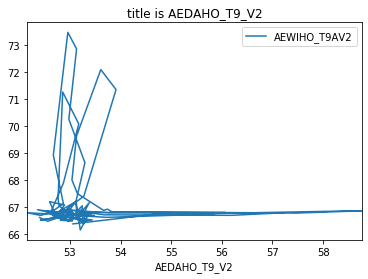

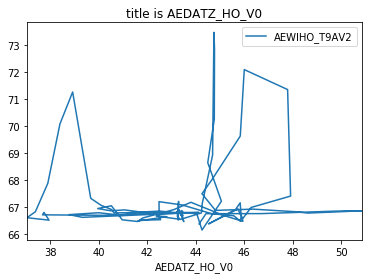

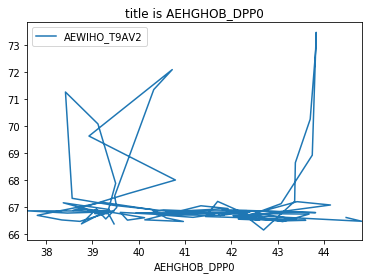

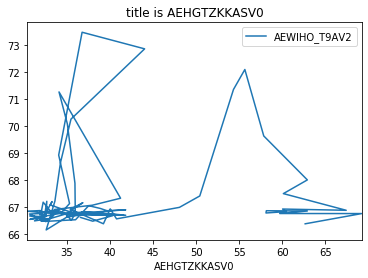

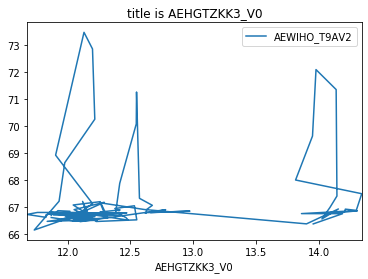

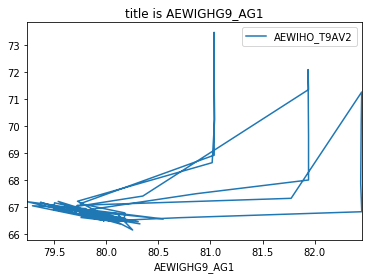

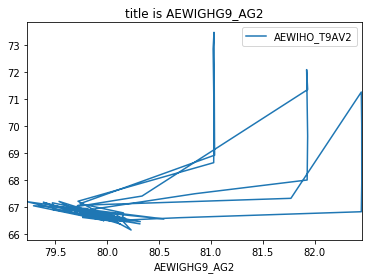

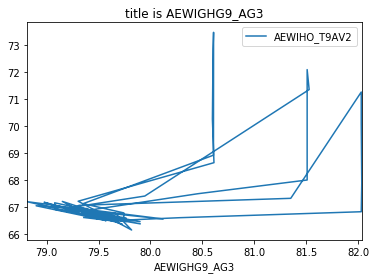

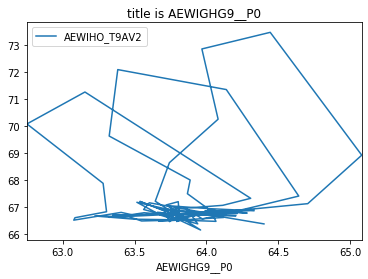

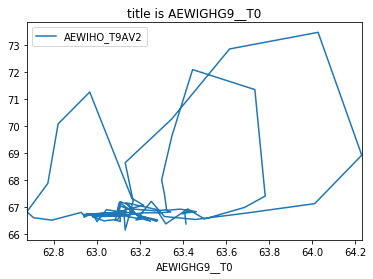

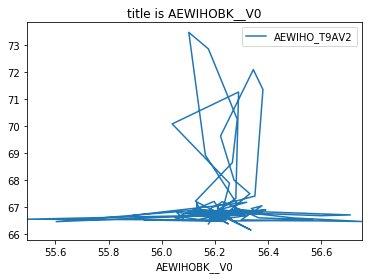

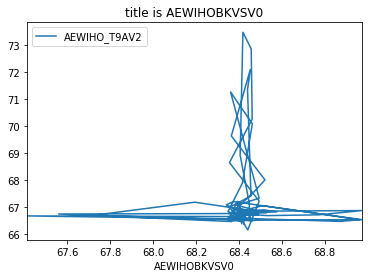

In [50]:
for now_num in range(12):
    col_name = dataframe_high_correlation.columns[now_num]
    dataframe_high_correlation.iloc[0:100].plot(dataframe_high_correlation.columns[now_num],dataframe_high_correlation.columns[-1])
    plt.title('title is '+str(col_name))

In [48]:
# code for plotting graph between every feature. Partial colinearity checking
print(dataframe_high_correlation.shape)
feature_array = []
for u in dataframe_high_correlation:
    if u != dataframe_high_correlation.columns[-1]:
        feature_array=np.append(feature_array,u)
        
len(feature_array)

(36126, 13)


12

In [60]:
# p=0
# q=0
# r=8
# count = 0
# q = p+1
# for h in range(29):
#     print('loop num: ',h,'\n')
#     if p !=r and q!=r:
# #         dataframe_high_correlation.iloc[0:100].plot(dataframe_high_correlation.columns[p],dataframe_high_correlation.columns[q])
# #         plt.title(dataframe_high_correlation.columns[p]+'_vs_'+dataframe_high_correlation.columns[q])
#         print('------------count: ',count,' p: ',p,'\t q: ',q)
#         q+=1
#         count+=1
#         if q == r:
#             p+=1
#             q=p+1
#             print('now val of p: ',p,' and q: ',q)
#             if p == r-1:
#                 print('val of p is: ',p)
#                 print('finish')
    

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


finish


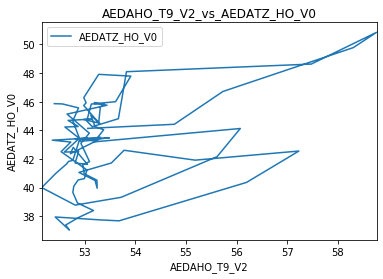

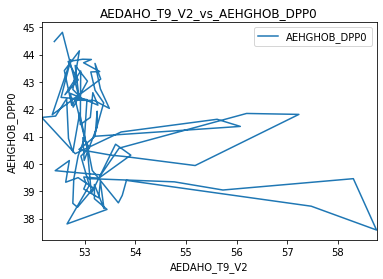

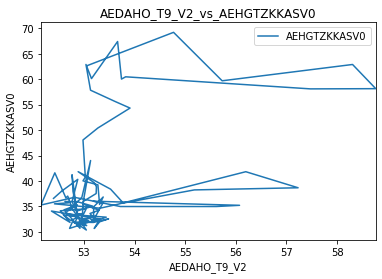

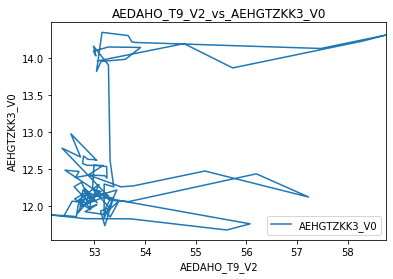

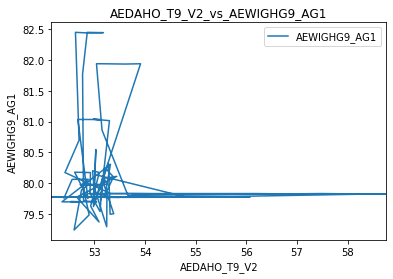

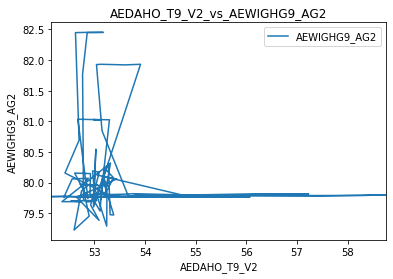

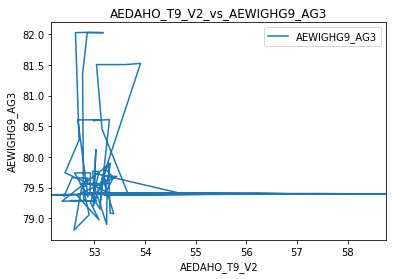

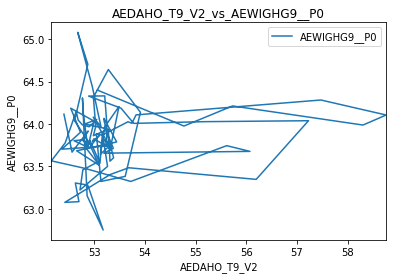

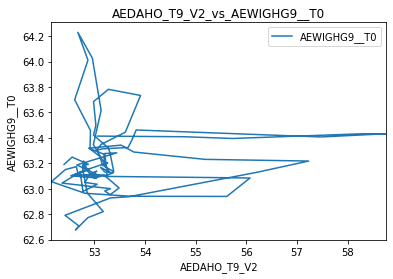

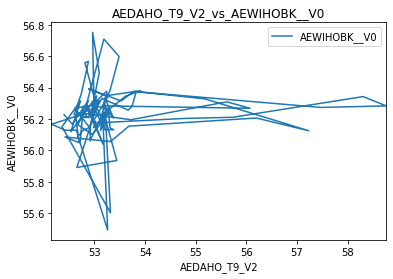

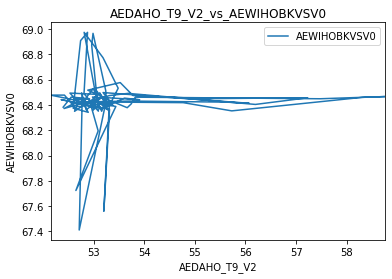

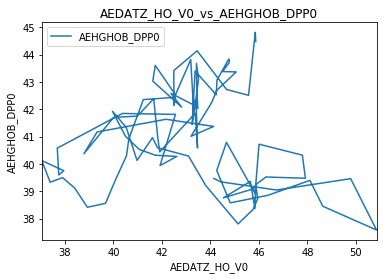

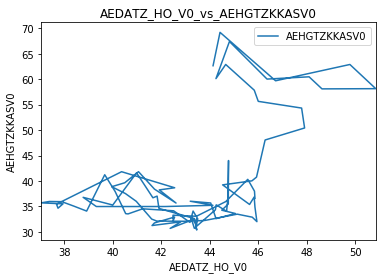

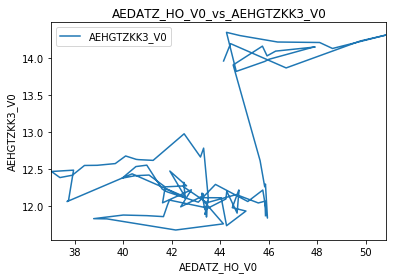

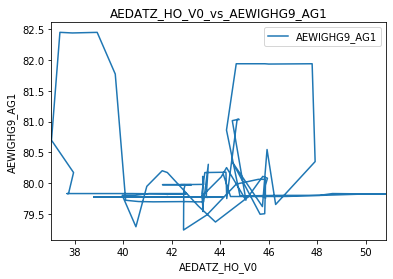

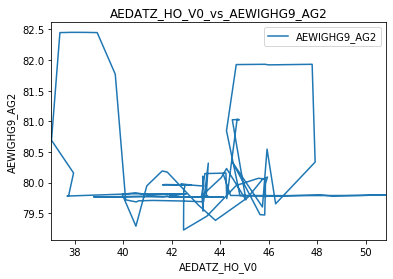

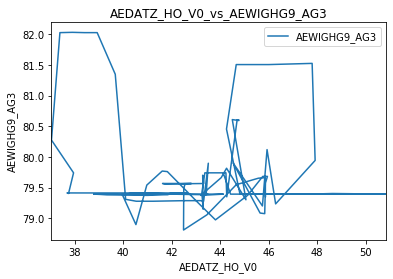

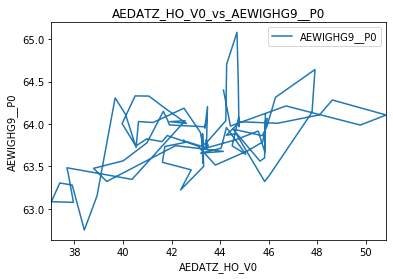

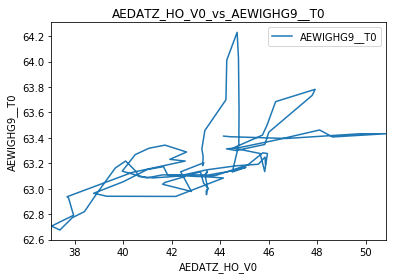

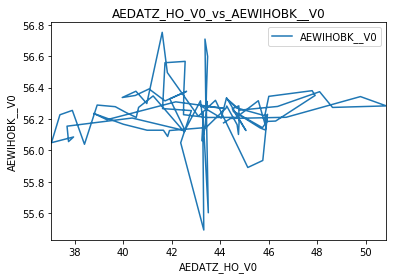

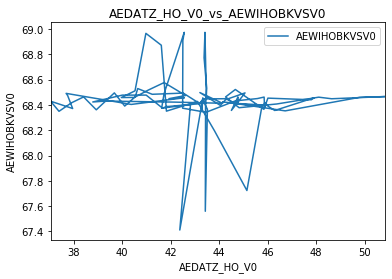

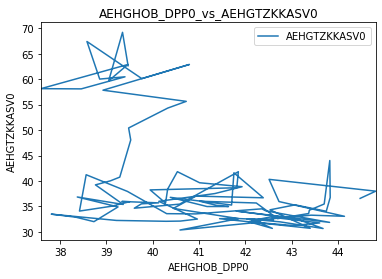

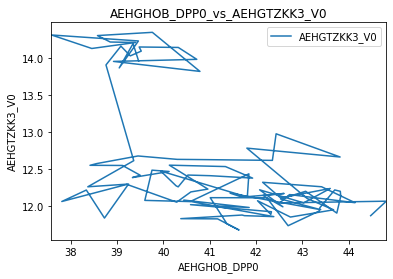

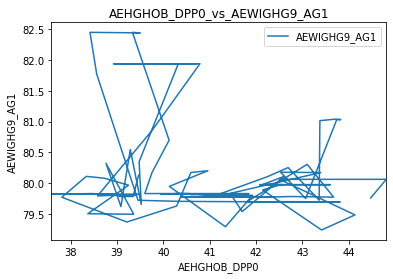

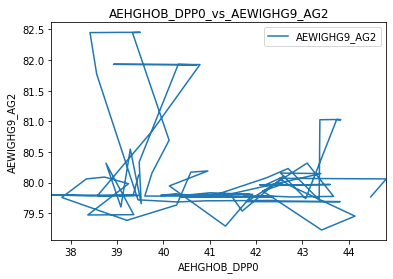

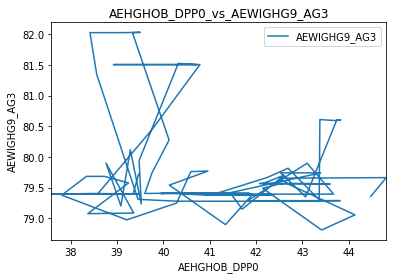

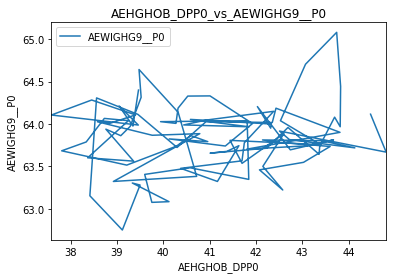

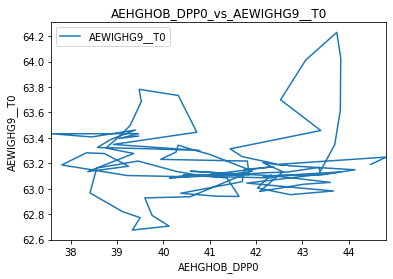

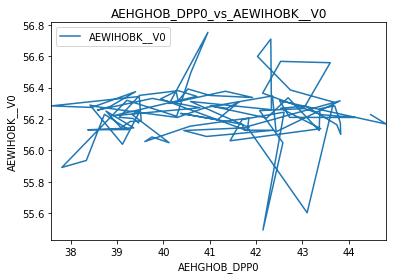

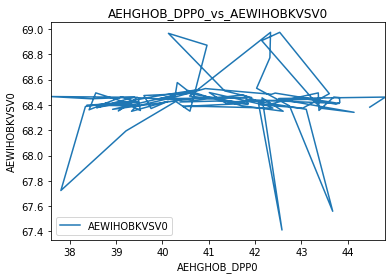

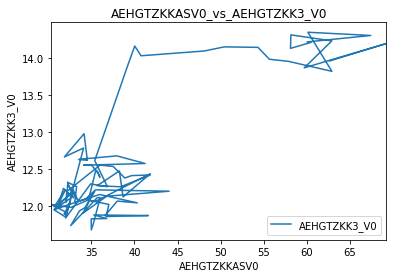

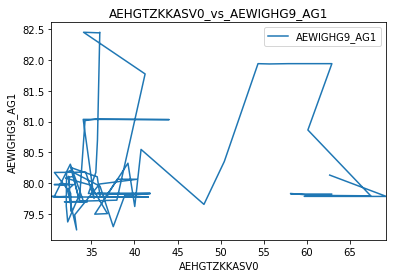

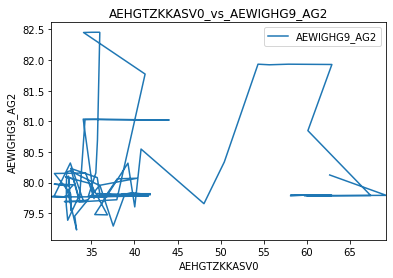

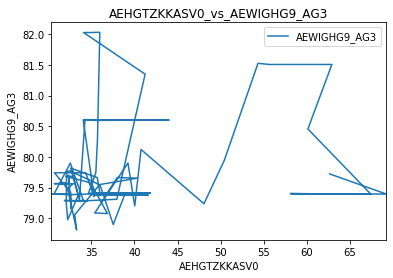

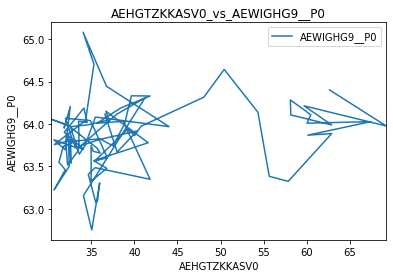

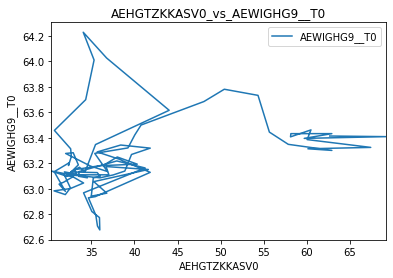

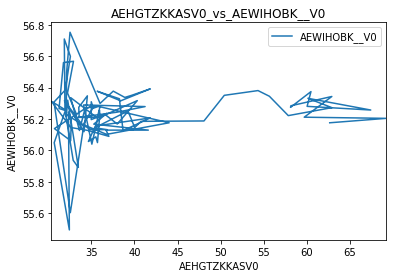

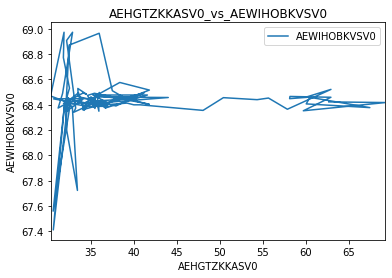

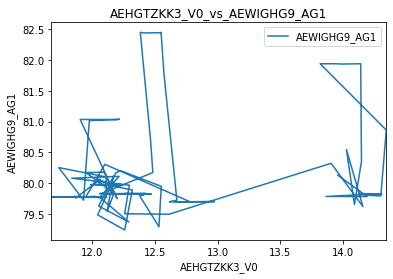

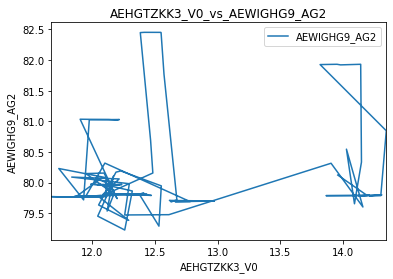

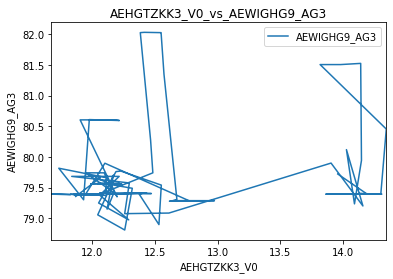

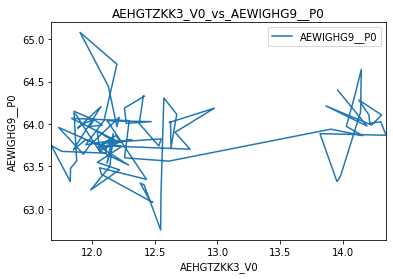

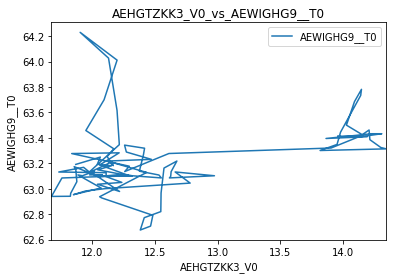

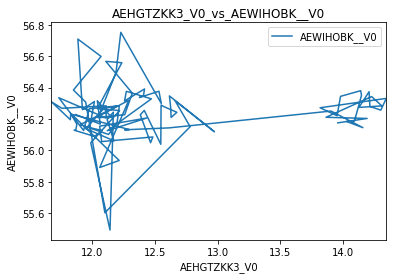

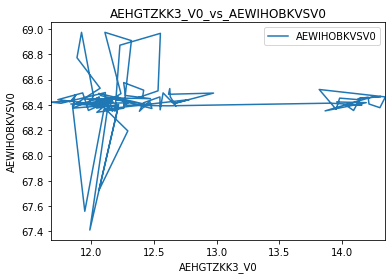

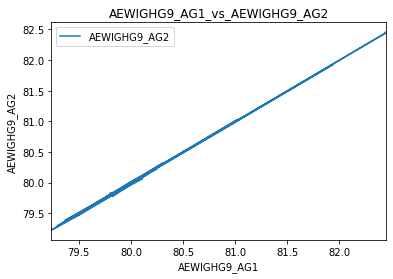

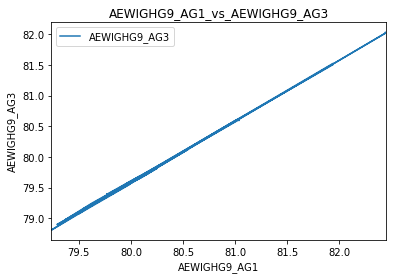

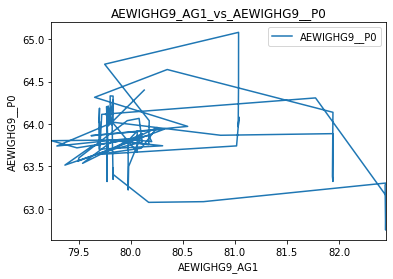

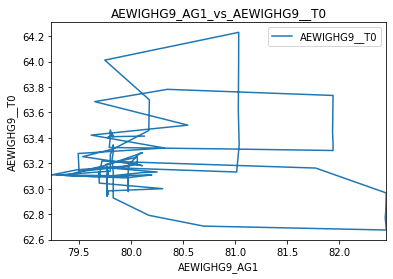

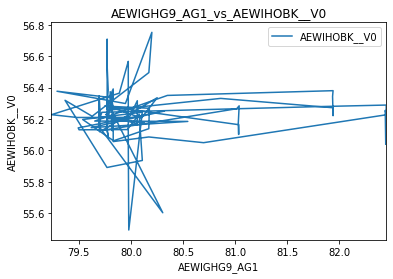

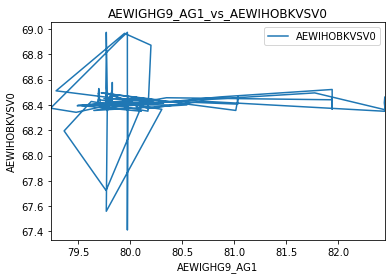

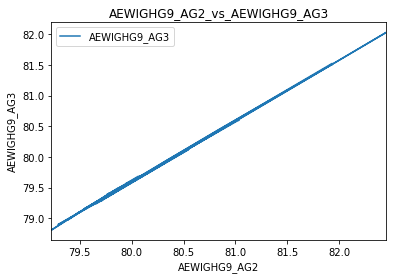

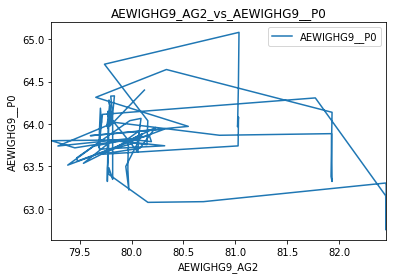

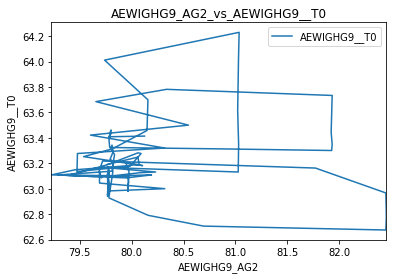

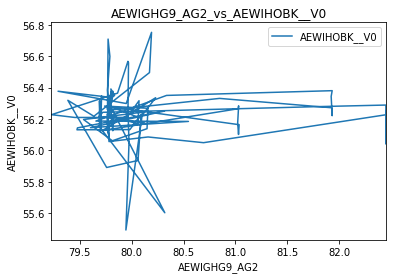

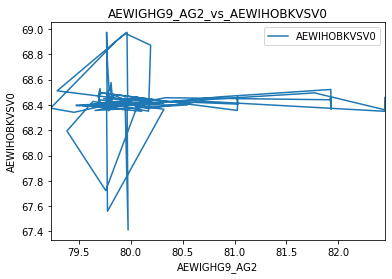

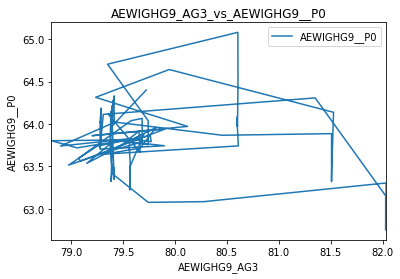

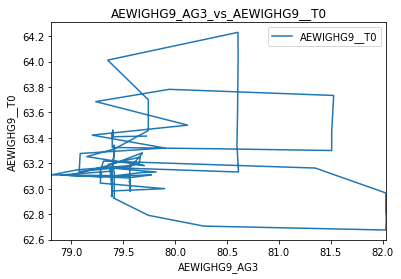

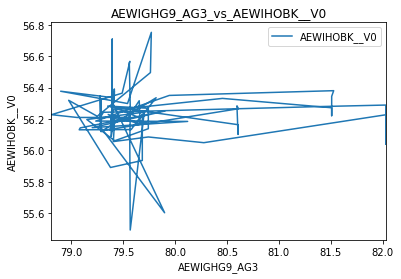

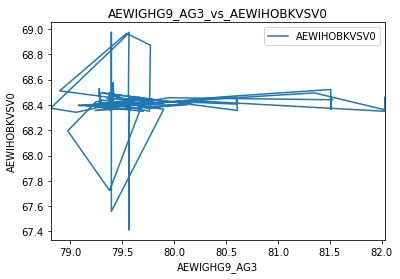

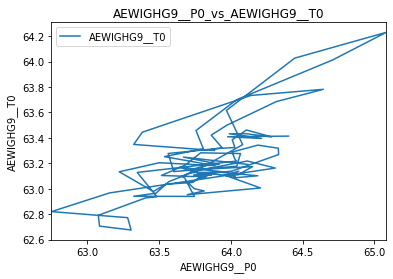

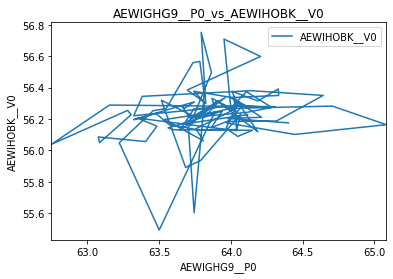

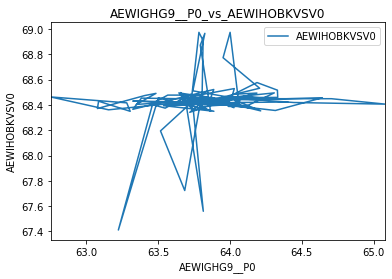

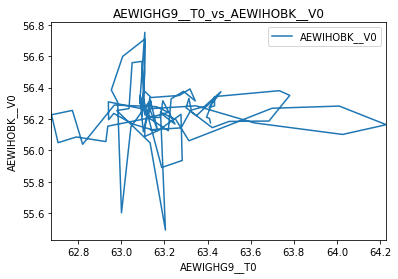

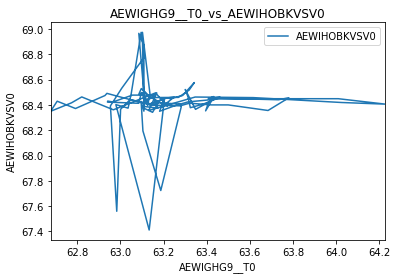

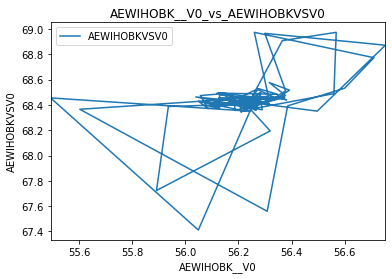

In [51]:
p=0
q=0
column_number=12
count = 0
q = p+1
for h in range(67):
#     print('loop num: ',h,'\n')
    if p !=column_number and q!=column_number:
        dataframe_high_correlation.iloc[0:100].plot(dataframe_high_correlation.columns[p],dataframe_high_correlation.columns[q])
        plt.xlabel(dataframe_high_correlation.columns[p])
        plt.ylabel(dataframe_high_correlation.columns[q])
        plt.title(dataframe_high_correlation.columns[p]+'_vs_'+dataframe_high_correlation.columns[q])
#         print('\n')
#         print('------------count: ',count,' p: ',p,'\t q: ',q)
        q+=1
        count+=1
        if q == column_number:
            p+=1
            q=p+1
#             print('now val of p: ',p,' and q: ',q)
            if p == column_number-1:
#                 print('val of p is: ',p)
                print('finish')
    

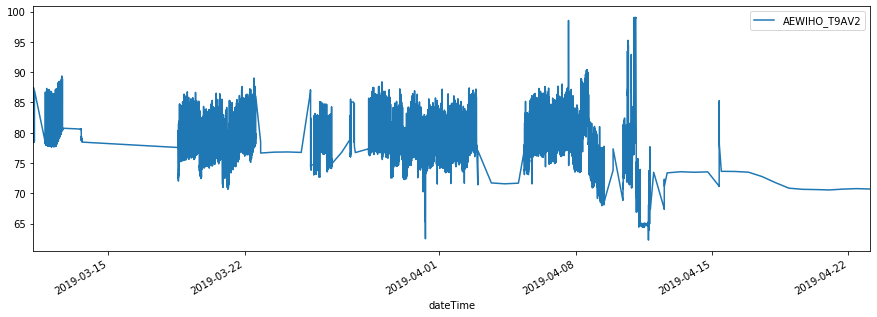

In [69]:
dataframe_datetime.iloc[0:].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# make dataset for training

In [92]:
def make_dataset(dataframe):
    dataset = np.array(dataframe)
    NumberOfElements = int(len(dataset) * 0.98)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    print('test_input shape: ', test_input.shape)
    test_output = dataset[NumberOfElements:len(dataset), -1]
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation)

Number of Elements for training:  23625
dataset length:  24108
train_input shape:  (23625, 8)
train_output shape:  (23625,)
test_input shape:  (483, 8)
test_output shape:  (483,)


# training with different scikit learn model

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn import linear_model


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [94]:
def plot_graph(test_output, predicted_output):
    plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)), color='red')
    plt.scatter(test_output,predicted_output, color = 'blue')
    # plt.savefig(model+'_'+'figure_actual_vs_predicted_with_best_fit_line.jpg')
    plt.xlabel('test_output')
    plt.ylabel('predicted_output')
    plt.title('scatter plotting of predicted_output alongside with the average line of test and predicted output')
    plt.show()
    
    
    difference_of_value = predicted_output - test_output
    print(type(difference_of_value))

    plt.plot(difference_of_value[:])
    plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
    plt.ylabel('difference of value')
    plt.xlabel('range')
    plt.grid(b=None, which='both', axis='both')
# plt.savefig(model+'_'+'difference_of_actual_and_predicted_value.png')
    plt.show()
    
    
    plt.hist(difference_of_value, bins=15)
# plt.xlim(-10,10,1)
# plt.savefig(model+'_'+'histogram_of_difference_value.jpg')
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title('histogram of value of difference')
    plt.show()
    
    plt.plot(predicted_output[0:len(predicted_output[0:300])], color = 'blue')
    plt.plot(test_output[0:300], color = 'red')
# plt.xlim(0,40,1)
# plt.ylim(50,70,1)
# plt.savefig(model+'_'+'figure_difference_between_actual_and_predicted_value.jpg')
    plt.xlabel('range')
    plt.ylabel('value of test and predicted output')
    plt.title('Visualization of test and predicted output in the same timestamp')
    plt.show()

In [95]:
def scikit_learn_model(model_list, name, train_input,train_output, test_input, test_output):
    for idx, i in enumerate(model_list):
        train_model_1 = i
        print('-------', name[idx])
        train_model_1.fit(train_input, train_output)
        predicted_output = train_model_1.predict(test_input)
        
        graph = plot_graph(test_output,predicted_output)
        
        print('r_2 statistic: %.2f' % r2_score(test_output, predicted_output))
        print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output, predicted_output))
        print("Mean squared error: %.2f" % mean_squared_error(test_output, predicted_output))
        RMSE = math.sqrt(mean_squared_error(test_output, predicted_output))
        print('RMSE: ', RMSE)
        print('!!!!---------------!!!!----------------!!!!')

------- LinearRegression


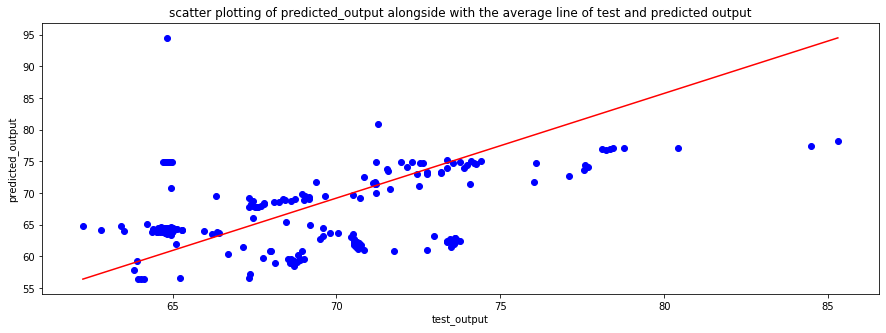

<class 'numpy.ndarray'>


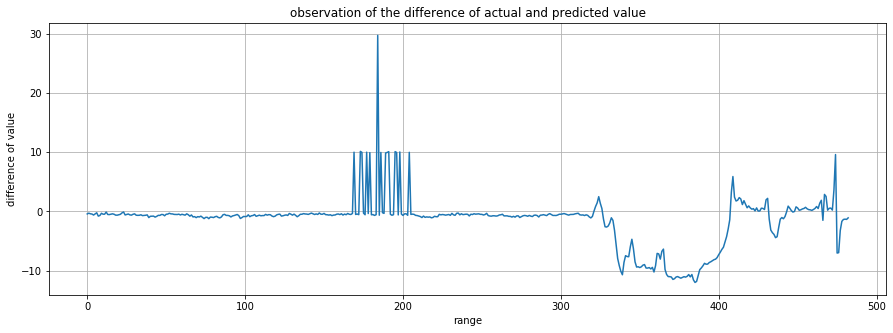

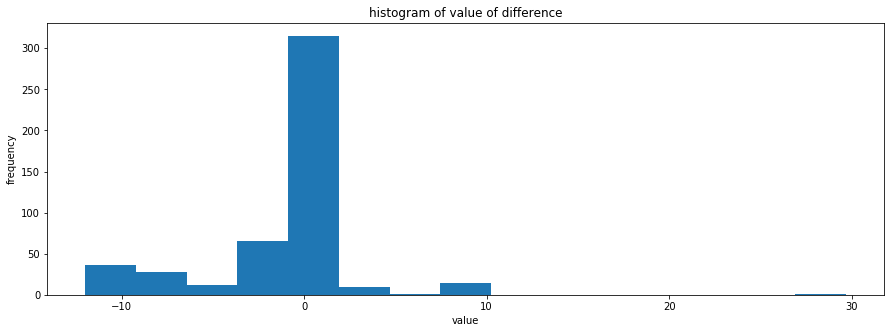

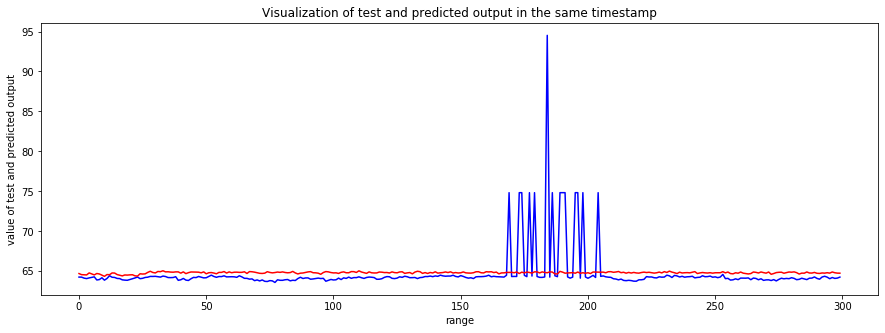

r_2 statistic: -0.47
Mean_absolute_error: 2.37
Mean squared error: 18.40
RMSE:  4.288955439133746
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


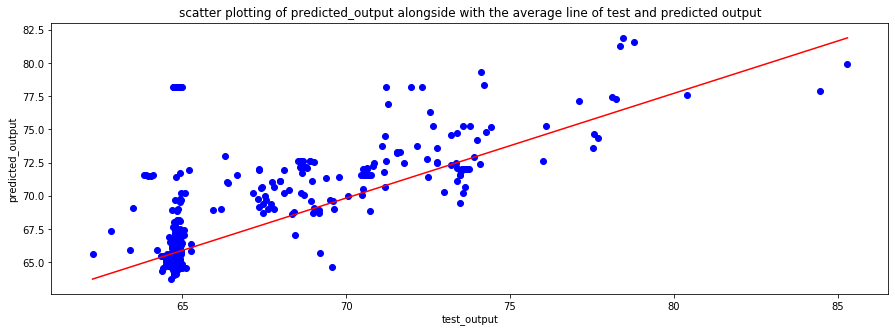

<class 'numpy.ndarray'>


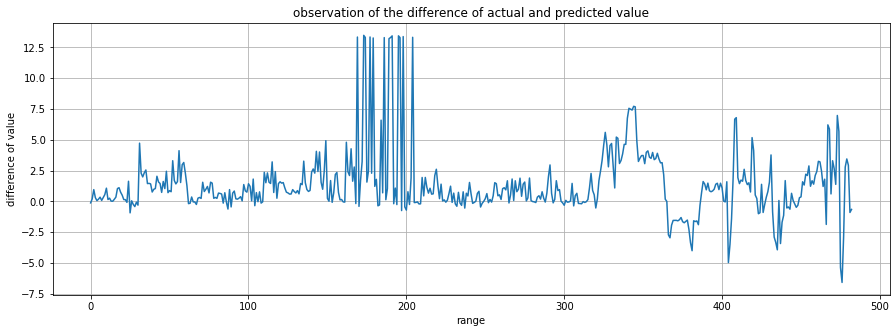

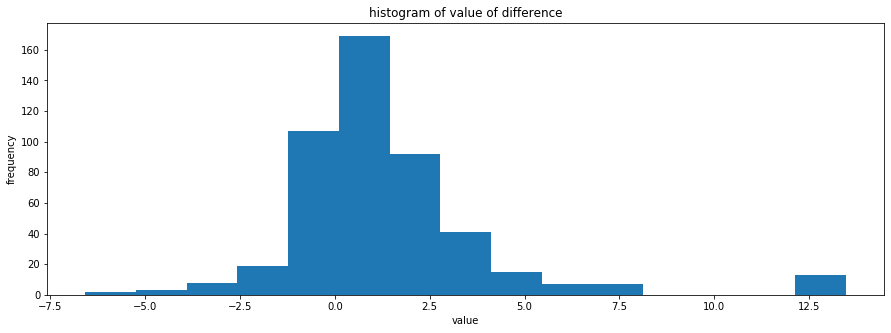

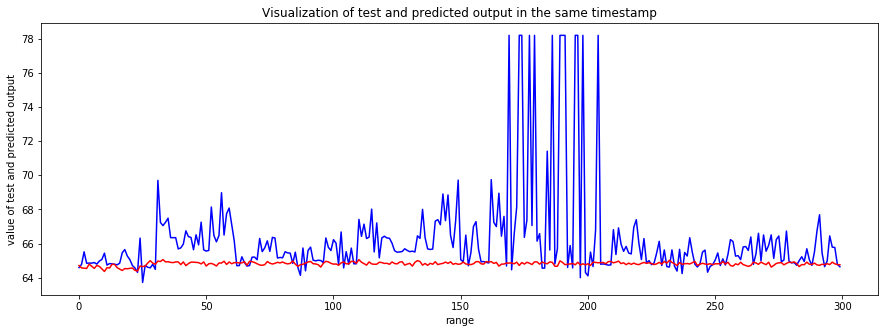

r_2 statistic: 0.26
Mean_absolute_error: 1.82
Mean squared error: 9.31
RMSE:  3.0519566997253476
!!!!---------------!!!!----------------!!!!


In [60]:
model_list = [LinearRegression(), ExtraTreesRegressor()]
name = ['LinearRegression','ExtraTreesRegressor']

model_result = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output)

# PCA analysis on dataframe_datetime

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
dataframe_PCA = dataframe_datetime.copy()
print(dataframe_PCA.shape)

(24108, 1898)


In [79]:
pca_feature = dataframe_PCA.iloc[:,:-1].values
pca_target = dataframe_PCA.iloc[:,-1].values

pca_target_reshape = np.reshape(pca_target,(-1,1))

In [80]:
print(pca_feature.shape)
print(pca_target_reshape.shape)

(24108, 1897)
(24108, 1)


In [82]:
pca_feature_scaled = StandardScaler().fit_transform(pca_feature)
pca_target_scaled = StandardScaler().fit_transform(pca_target_reshape)

In [83]:
# pca = PCA(n_components=4)
# principalComponents = pca.fit_transform(pca_feature_scaled)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pca_1', 'pca_2','pca_3', 'pca_4'], index= dataframe_PCA.index)

In [124]:
num_sart = 97
component = 26
num_end = num_sart +component
pca_column_array = []
for i in range(num_sart, num_end):
    pca_column_array = np.append(pca_column_array,chr(i))

pca = PCA(n_components=component)
principalComponents = pca.fit_transform(pca_feature) #here use pca_feature_scaled to observe different result
principalDf = pd.DataFrame(data = principalComponents
             , columns = pca_column_array, index= dataframe_PCA.index)

In [125]:
print(principalDf.shape)

(24108, 26)


In [126]:
target_pca_array=[]
target_pca_array= np.append(target_pca_array, dataframe_PCA.columns[-1])
target_pca_array

y_df = pd.DataFrame(data=pca_target_reshape, columns = target_pca_array,index=dataframe_PCA.index) # here use pca_target_scaled to observe different reslult
print(y_df.shape)
print(y_df.head())

(24108, 1)
                     AEWIHO_T9AV2
dateTime                         
2019-03-11 03:14:00     79.178306
2019-03-11 03:15:00     81.659117
2019-03-11 03:16:00     86.055430
2019-03-11 03:17:00     87.113691
2019-03-11 03:18:00     87.266264


In [127]:
finalDf = pd.concat([principalDf, y_df], axis = 1)
finalDf.head(5)

a          b           c           d          e  \
dateTime                                                                        
2019-03-11 03:14:00  785.032294  21.580980 -167.832033  217.461825 -46.969404   
2019-03-11 03:15:00  782.688733  18.630533 -170.477739  219.485385 -46.004516   
2019-03-11 03:16:00  778.600527  16.813885 -174.099256  219.413398 -47.250178   
2019-03-11 03:17:00  778.765469  20.178348 -168.981541  220.999646 -48.256204   
2019-03-11 03:18:00  776.278560  23.808286 -166.220826  218.452910 -52.613825   

                              f          g          h          i          j  \
dateTime                                                                      
2019-03-11 03:14:00  328.135940  70.195747 -70.547044  45.080956 -56.411872   
2019-03-11 03:15:00  328.306898  70.443952 -65.092411  37.375249 -45.886236   
2019-03-11 03:16:00  334.240147  76.705468 -69.176249  37.384217 -44.565198   
2019-03-11 03:17:00  327.485670  79.138276 -70.507655  33.503252 -37.628771   
2019-03-11 03:18:00  326.865734  88.446704 -68.794095  34.205817 -30.734173   

                     ...           r          s          t          u  \
dateTime             ...                                                
2019-03-11 03:14:00  ... -100.738652 -69.940622  58.859079  -4.504589   
2019-03-11 03:15:00  ...  -98.584560 -59.961828  59.719528  -1.199185   
2019-03-11 03:16:00  ... -125.835334 -46.838962  61.007497  22.365817   
2019-03-11 03:17:00  ... -130.304347 -41.552377  73.039428   9.640935   
2019-03-11 03:18:00  ... -131.117692 -31.976837  80.339932   1.014851   

                             v          w          x          y          z  \
dateTime                                                                     
2019-03-11 03:14:00 -75.208031 -94.117194  11.558308  75.932027 -68.112847   
2019-03-11 03:15:00 -79.615309 -96.230612   8.099624  66.008548 -68.724529   
2019-03-11 03:16:00 -81.244629 -90.159546   2.664627  51.179796 -54.844302   
2019-03-11 03:17:00 -84.262173 -82.927444  -1.391576  37.042053 -52.238042   
2019-03-11 03:18:00 -86.868603 -76.330219 -19.010492  40.068778 -49.018967   

                     AEWIHO_T9AV2  
dateTime                           
2019-03-11 03:14:00     79.178306  
2019-03-11 03:15:00     81.659117  
2019-03-11 03:16:00     86.055430  
2019-03-11 03:17:00     87.113691  
2019-03-11 03:18:00     87.266264  

[5 rows x 27 columns]

In [128]:
train_input, train_output, test_input, test_output = make_dataset(finalDf)

Number of Elements for training:  23625
dataset length:  24108
train_input shape:  (23625, 26)
train_output shape:  (23625,)
test_input shape:  (483, 26)
test_output shape:  (483,)


------- LinearRegression


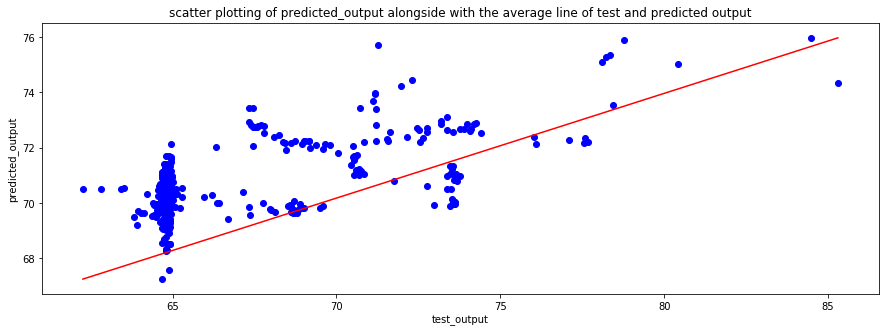

<class 'numpy.ndarray'>


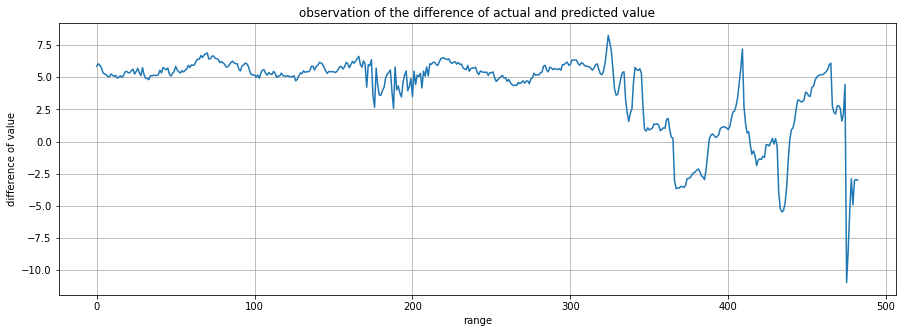

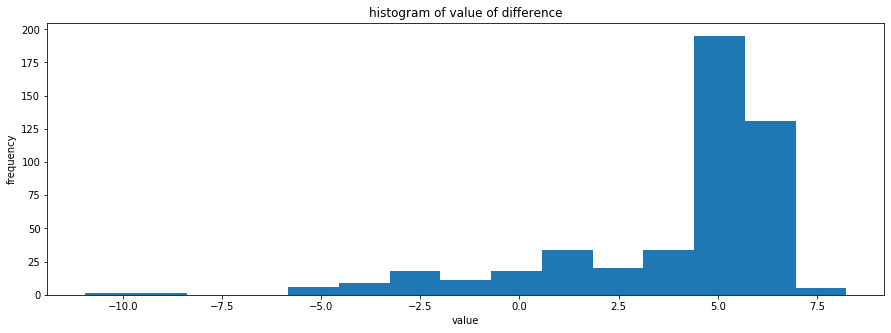

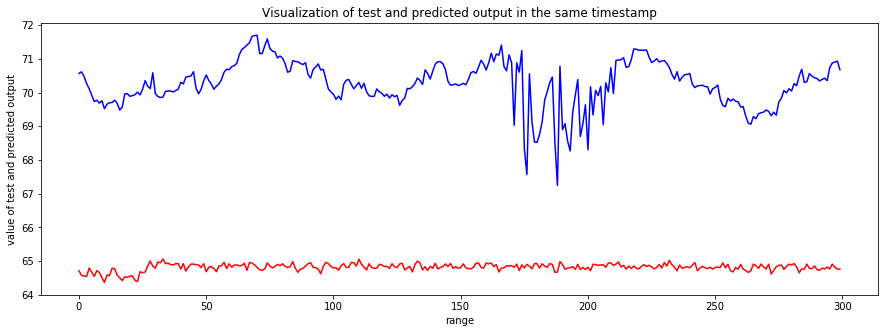

r_2 statistic: -0.94
Mean_absolute_error: 4.60
Mean squared error: 24.31
RMSE:  4.930639050724519
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


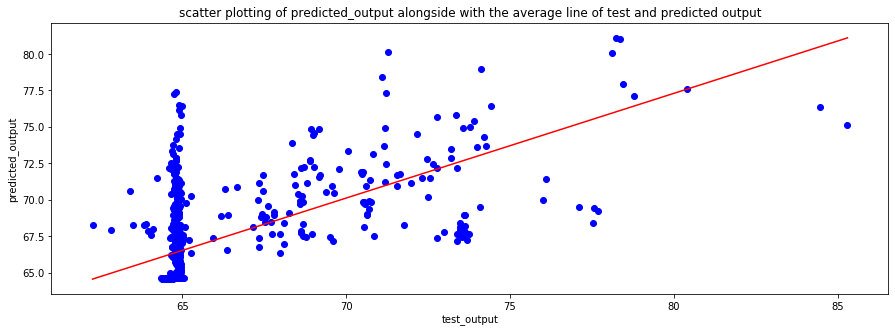

<class 'numpy.ndarray'>


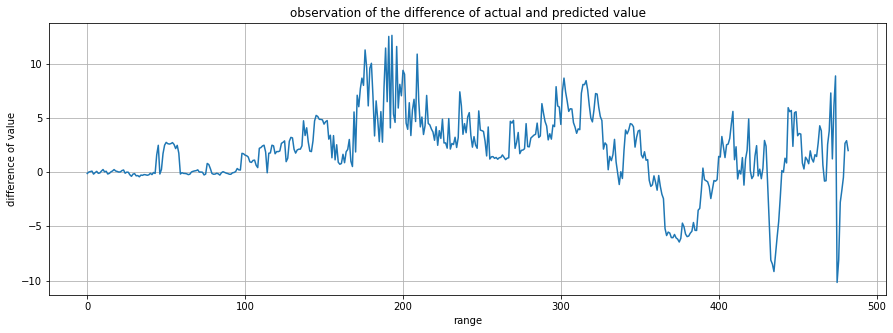

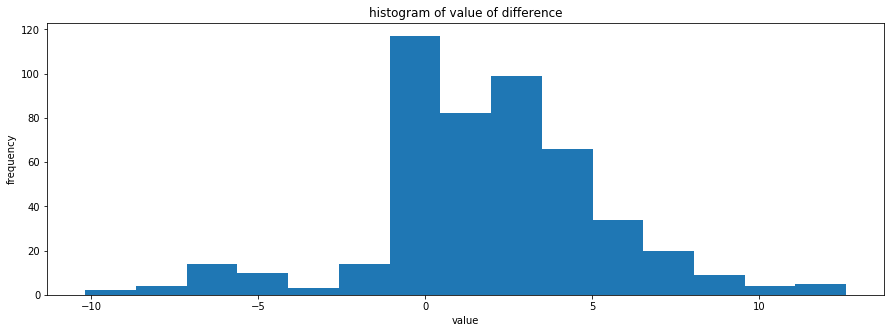

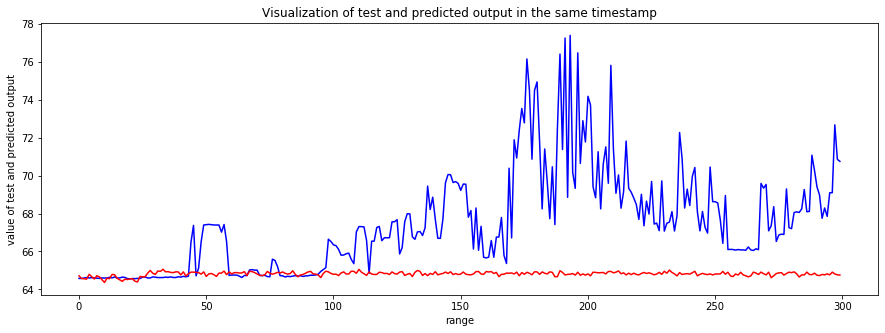

r_2 statistic: -0.21
Mean_absolute_error: 2.94
Mean squared error: 15.17
RMSE:  3.894698367006584
!!!!---------------!!!!----------------!!!!


In [129]:
model_list = [LinearRegression(), ExtraTreesRegressor()]
name = ['LinearRegression','ExtraTreesRegressor']

model_result = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output)

a
b
c
d


# Now dataframe for weekday, weekend, daywise, shiftwise will be made

In [14]:
# # checking type of the contect of the column
# s = df2['dateTime_column'].dtype
# print(s)

# # checking column type
# t = df2.dateTime_column
# print(type(t))

temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

In [17]:
target_now = temp_frame_1.columns.get_loc("DEWIHOBT9_I0")
print(target_now)

3880


In [18]:
def dataframe_date_time_type(dataframe):
    df = pd.DataFrame(index = dataframe.index)
    target_df = dataframe.loc[:,dataframe.columns[3880]]
#     target_df = dataframe.loc[:,dataframe.columns[-1]]
    df['dateTime_column'] =  pd.to_datetime(dataframe.index, format='%Y-%m-%d %H:%M')
    df['day_name'] = df.index.weekday_name
    df['TypeofDAY'] = np.where(df['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'Weekend') # if the associated number less than 5 then weekend, otherwise weekday
    df['TypeofDAY_number'] = np.where(df['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend
    df['Date'] = df['dateTime_column'].dt.strftime('%Y-%m-%d')
    
    df = pd.concat([df, target_df], axis=1)
    
    return df

# df = dataframe_date_time_type(dataframe_datetime)
df = dataframe_date_time_type(temp_frame_1)

In [22]:
df.head()

dateTime_column day_name TypeofDAY  TypeofDAY_number  \
dateTime                                                                       
2019-03-11 03:14:00 2019-03-11 03:14:00   Monday   Weekday                 1   
2019-03-11 03:15:00 2019-03-11 03:15:00   Monday   Weekday                 1   
2019-03-11 03:16:00 2019-03-11 03:16:00   Monday   Weekday                 1   
2019-03-11 03:17:00 2019-03-11 03:17:00   Monday   Weekday                 1   
2019-03-11 03:18:00 2019-03-11 03:18:00   Monday   Weekday                 1   

                           Date  DEWIHOBT9_I0  
dateTime                                       
2019-03-11 03:14:00  2019-03-11         100.0  
2019-03-11 03:15:00  2019-03-11         100.0  
2019-03-11 03:16:00  2019-03-11         100.0  
2019-03-11 03:17:00  2019-03-11         100.0  
2019-03-11 03:18:00  2019-03-11         100.0

In [19]:
dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

In [55]:
# for k_1 in day_type_key_value:
#     print(k_1)
#     my_week = dict_of_day_type[k_1]
#     my_week.iloc[:].plot(y=['AEWIHO_T9AV2'])
# #     describe = my_week['AEWIHO_T9AV2'].describe()
# #     RMSE = 2
# #     textstr = 'describe=%.2f\nRMSE=%.2f\n'%(1, 2)
# #     plt.text(0.5, 0.5, textstr, fontsize=14)
#     plt.savefig(str(k_1)+'.jpg')
# #     plt.close()

In [20]:
import os
current_directory = os.getcwd()
print(current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    pass
#     shutil.rmtree(final_directory,ignore_errors= True)
#     os.makedirs(final_directory)
#     print('after deletion old one created new : ', final_directory)

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/univariate_data_for_prediction


In [21]:
final_directory

'/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/univariate_data_for_prediction/image_folder'

/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737141.5138888889 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 737152.6666666666 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotli

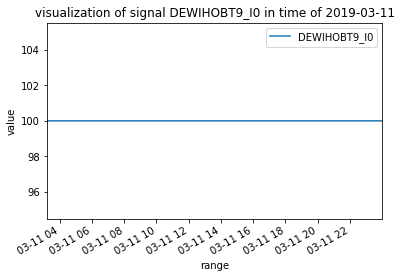

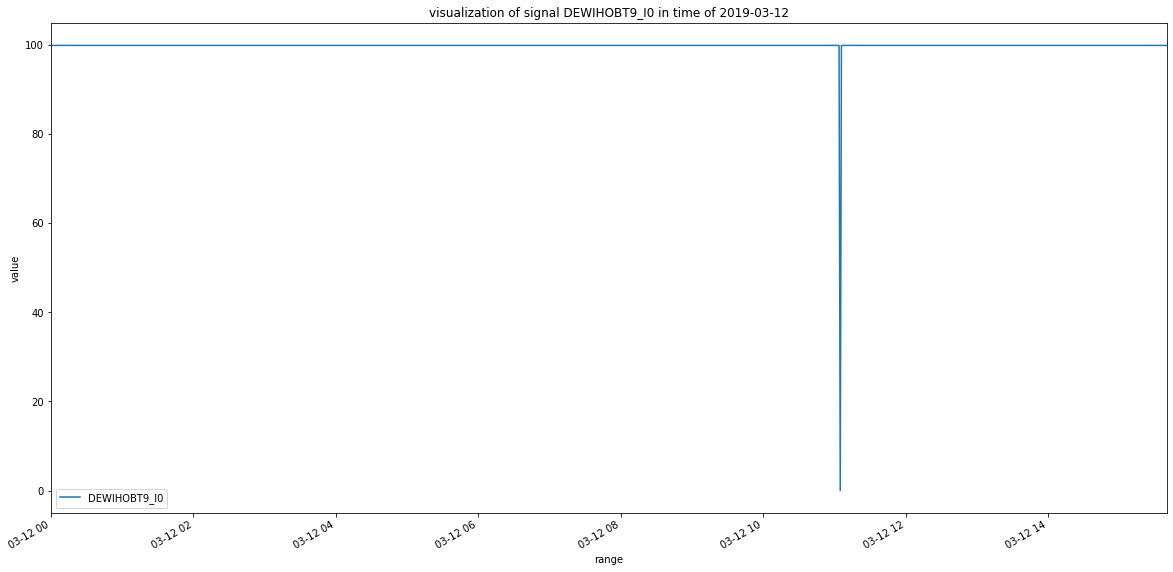

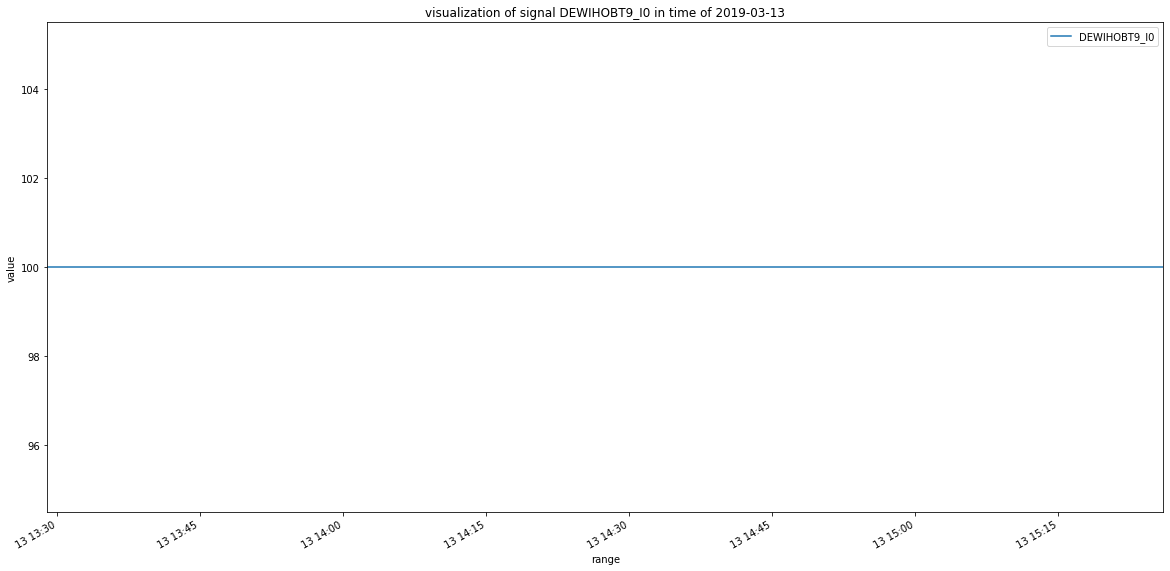

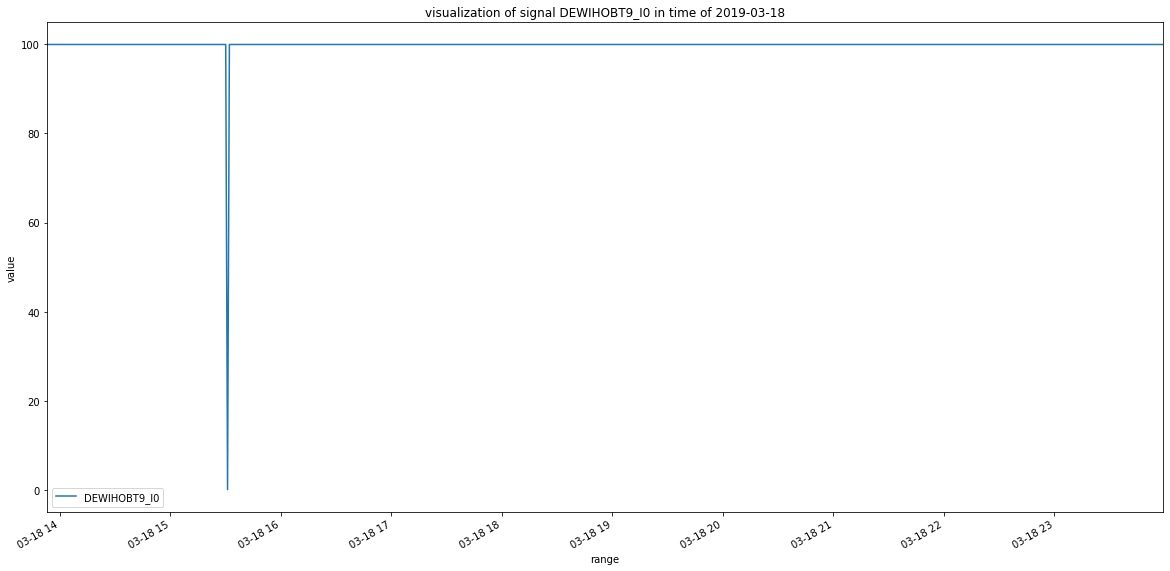

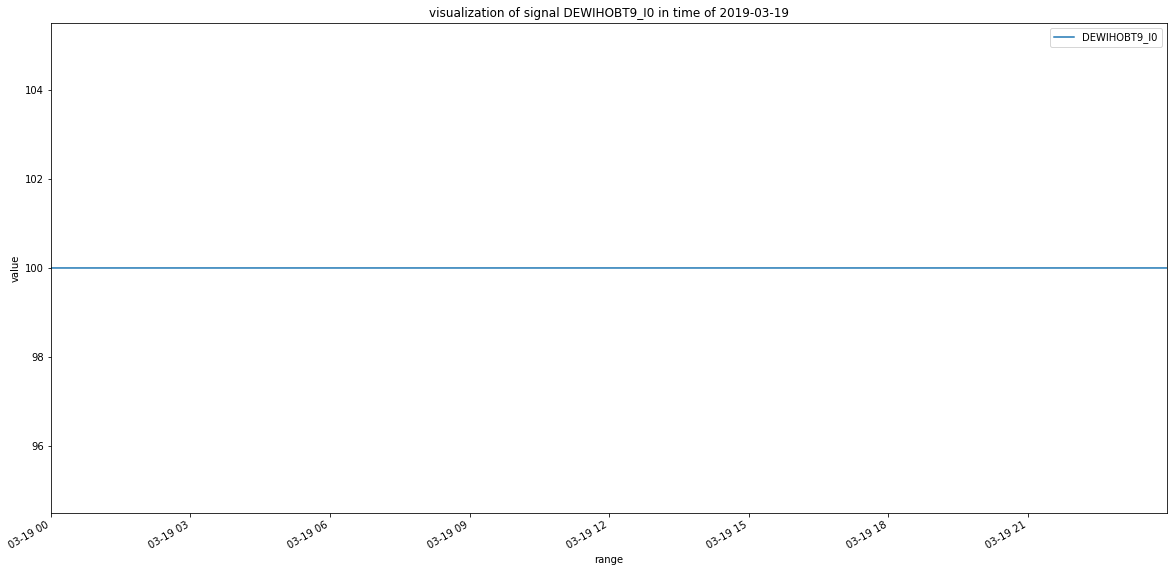

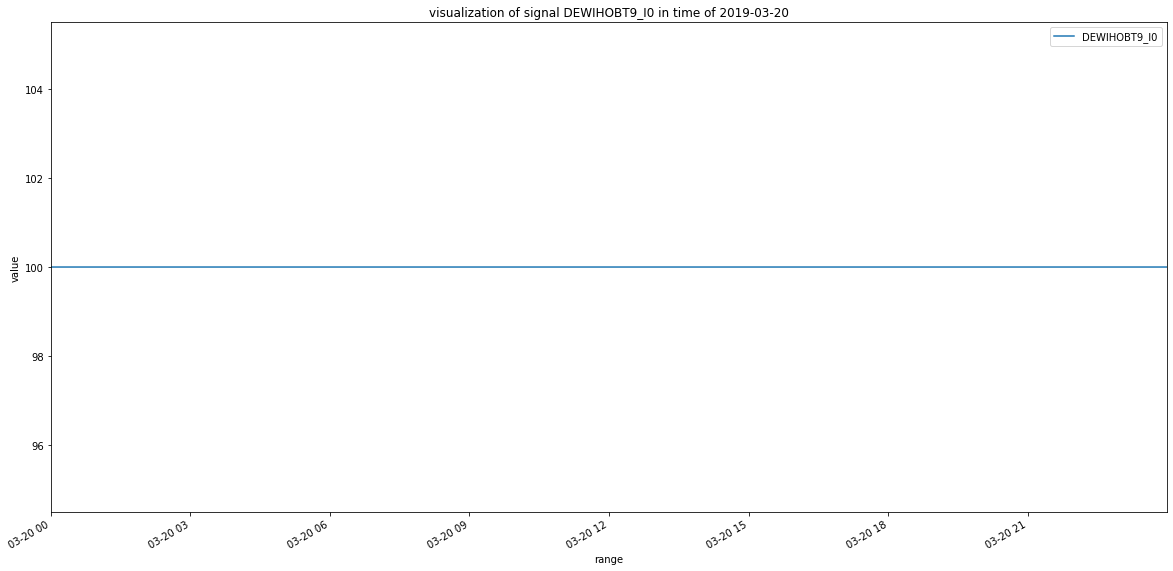

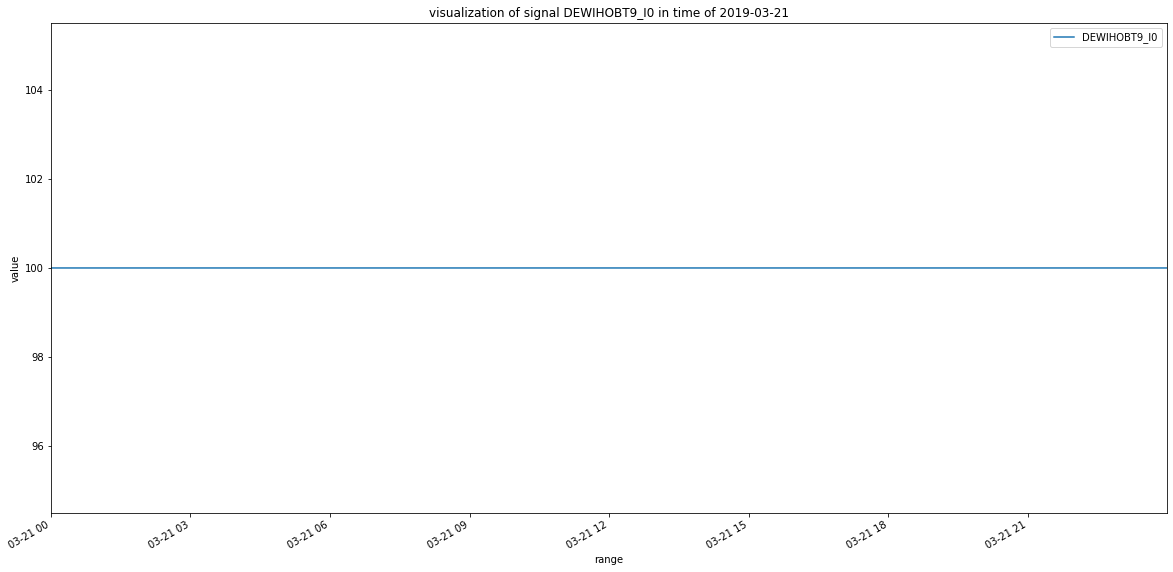

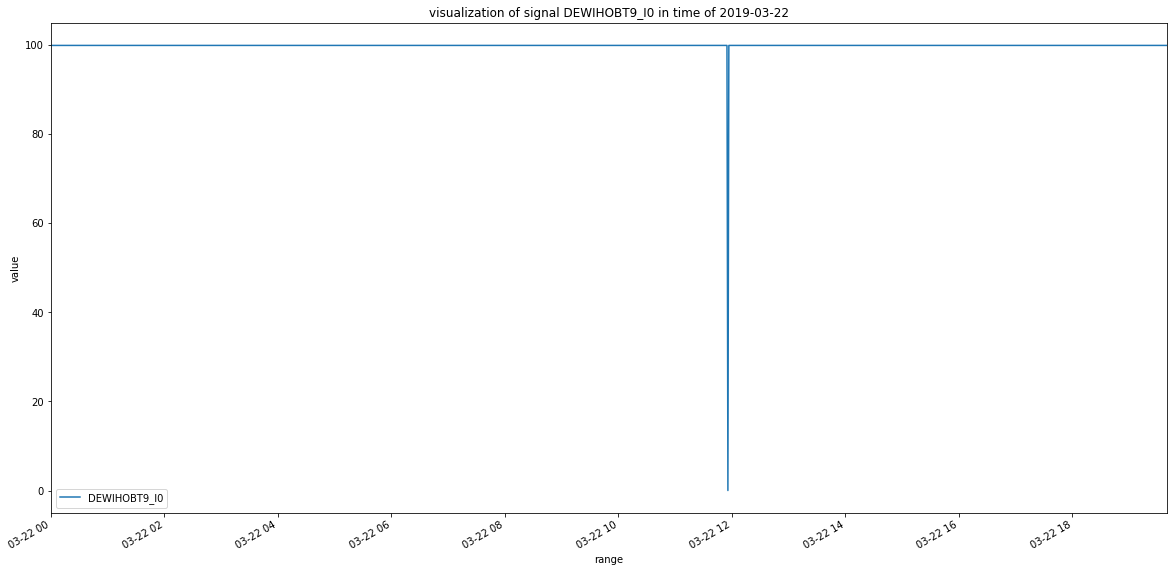

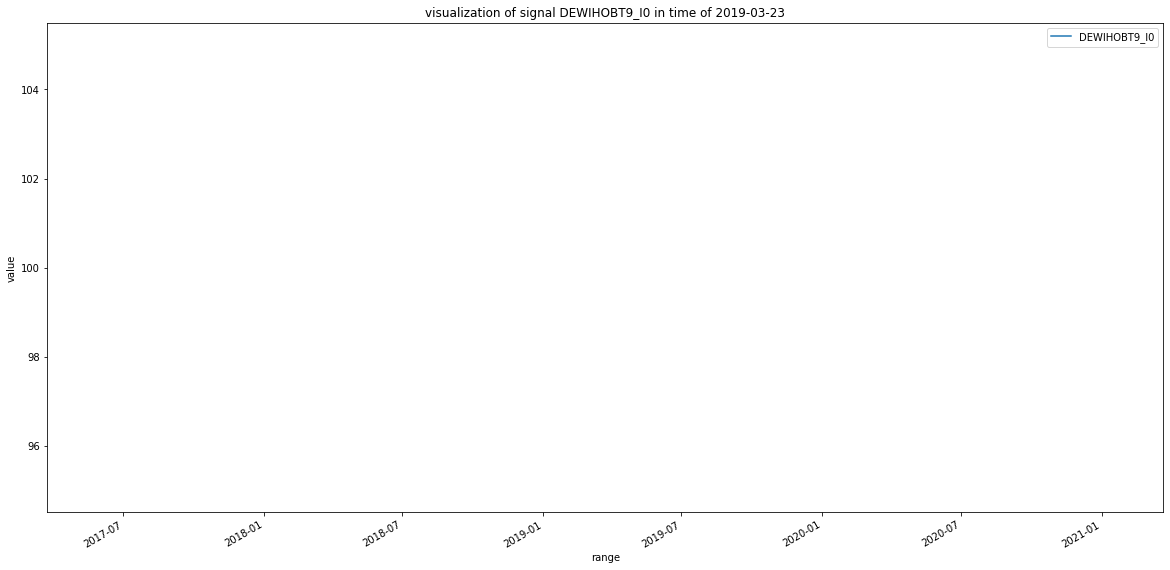

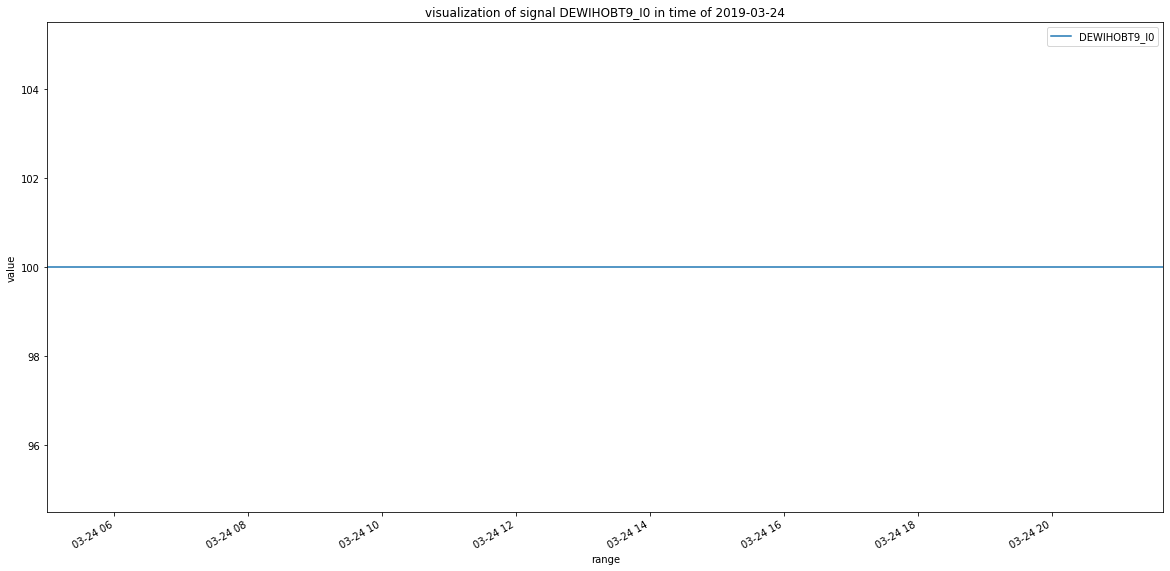

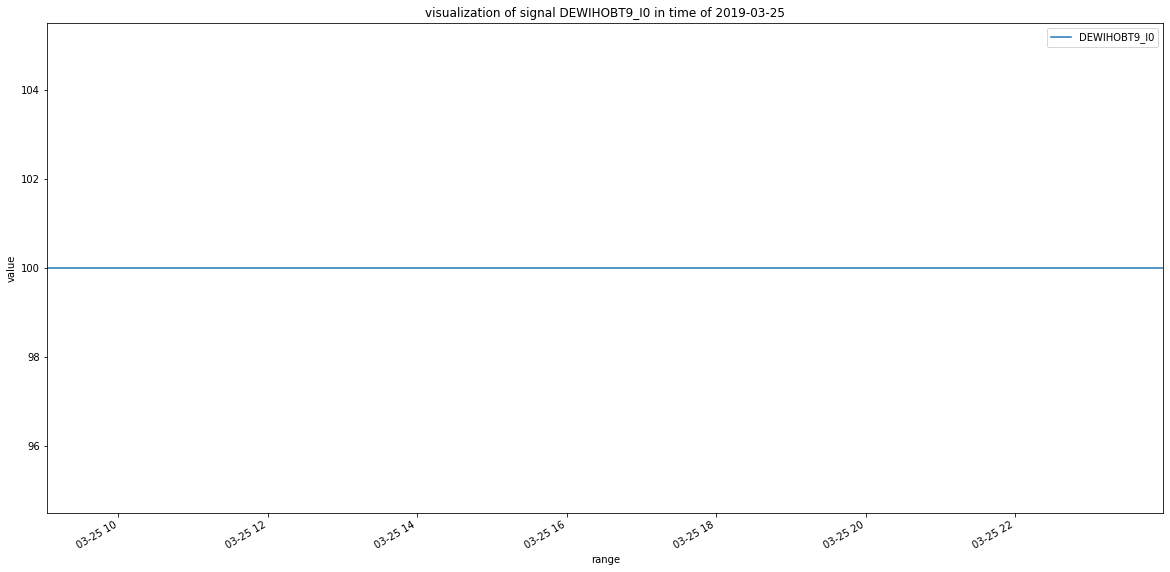

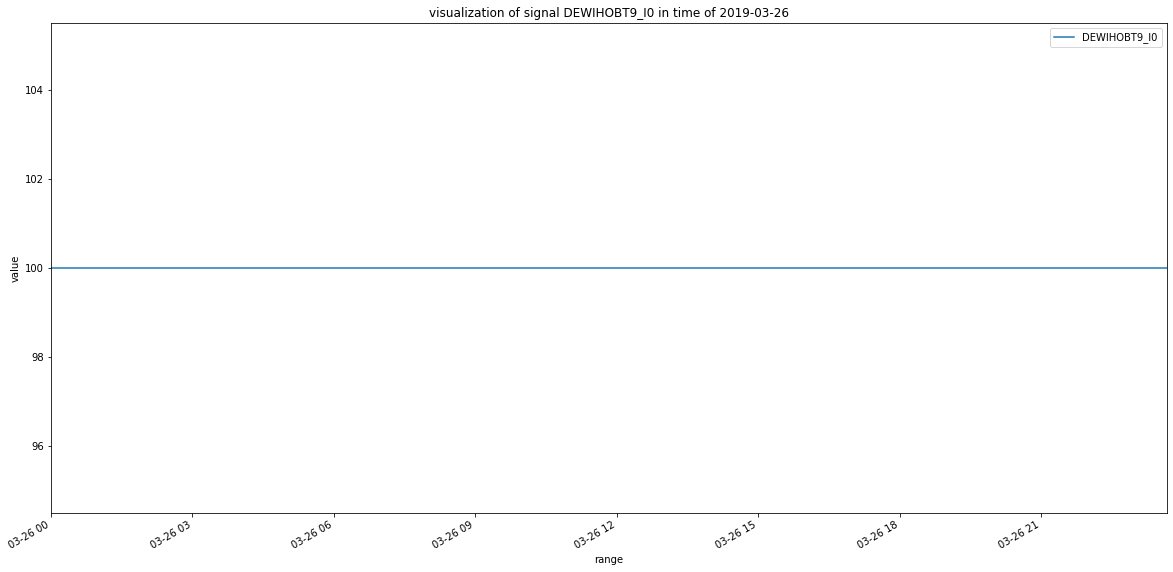

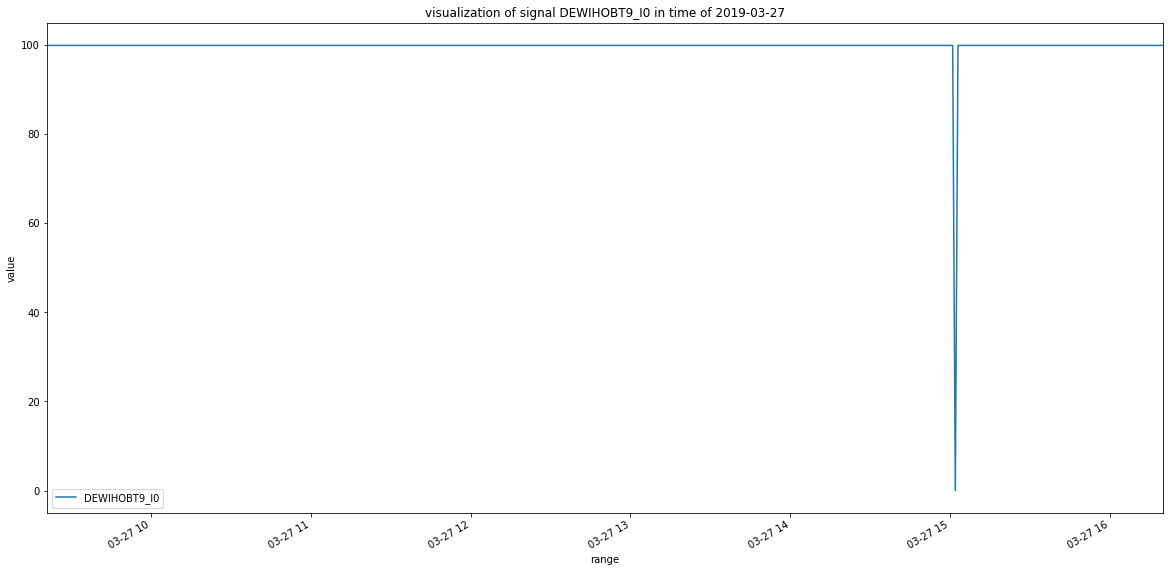

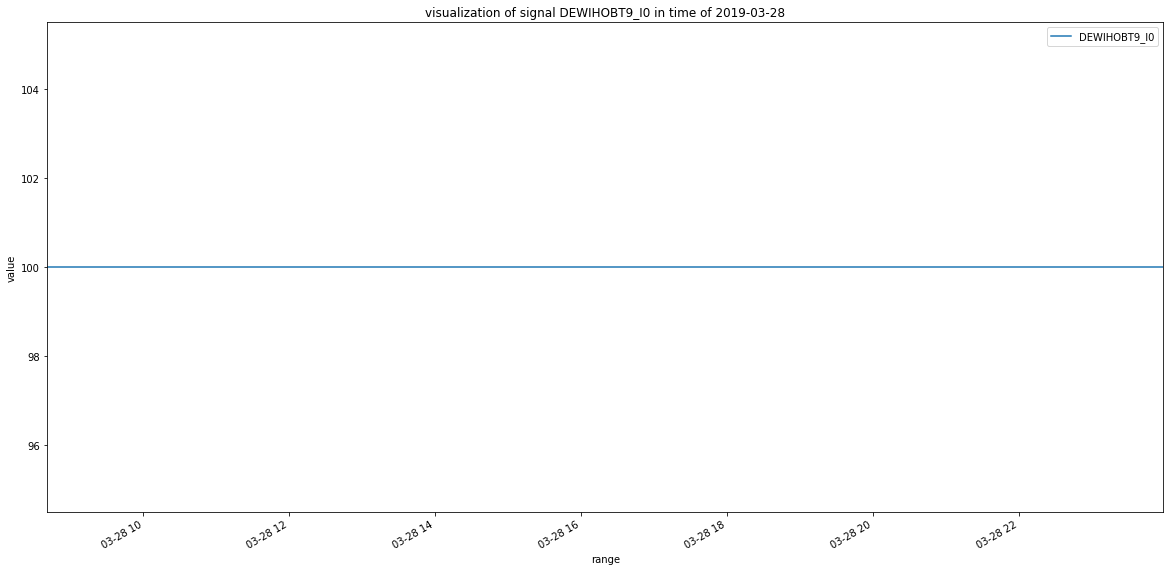

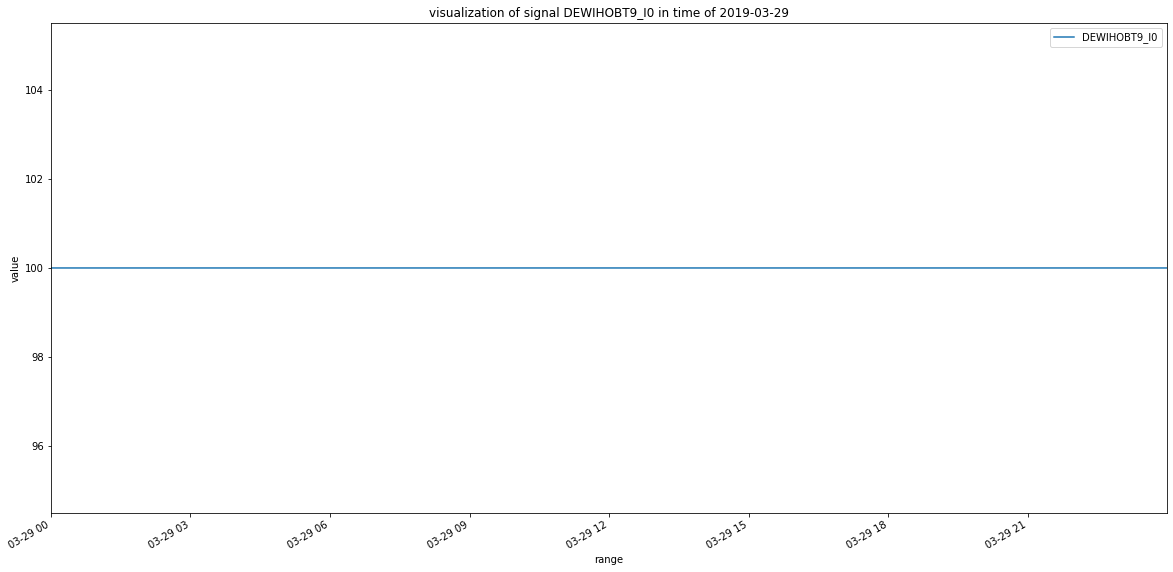

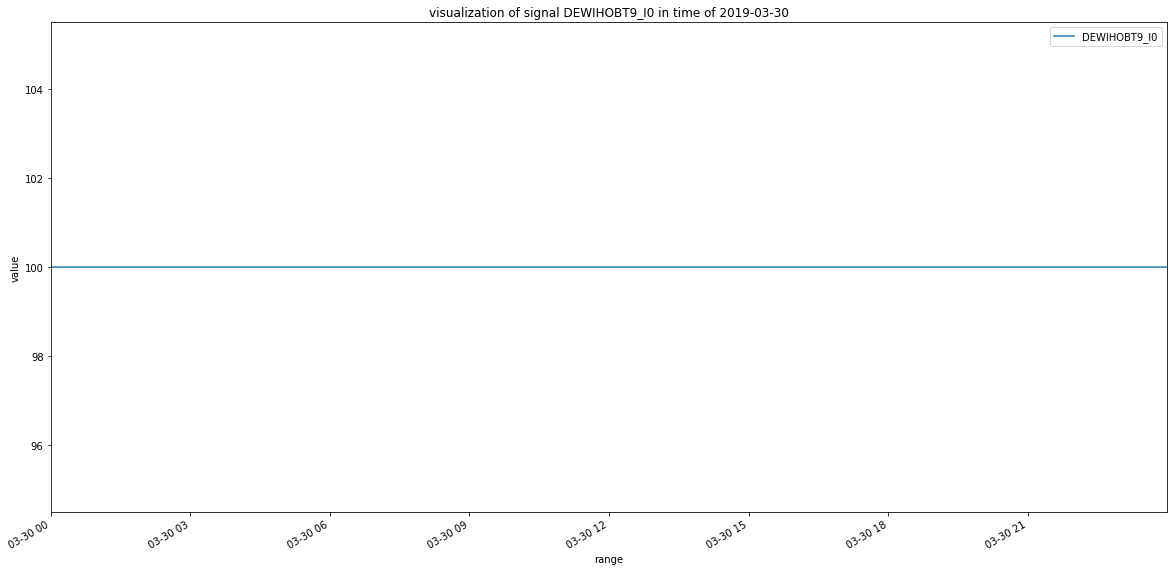

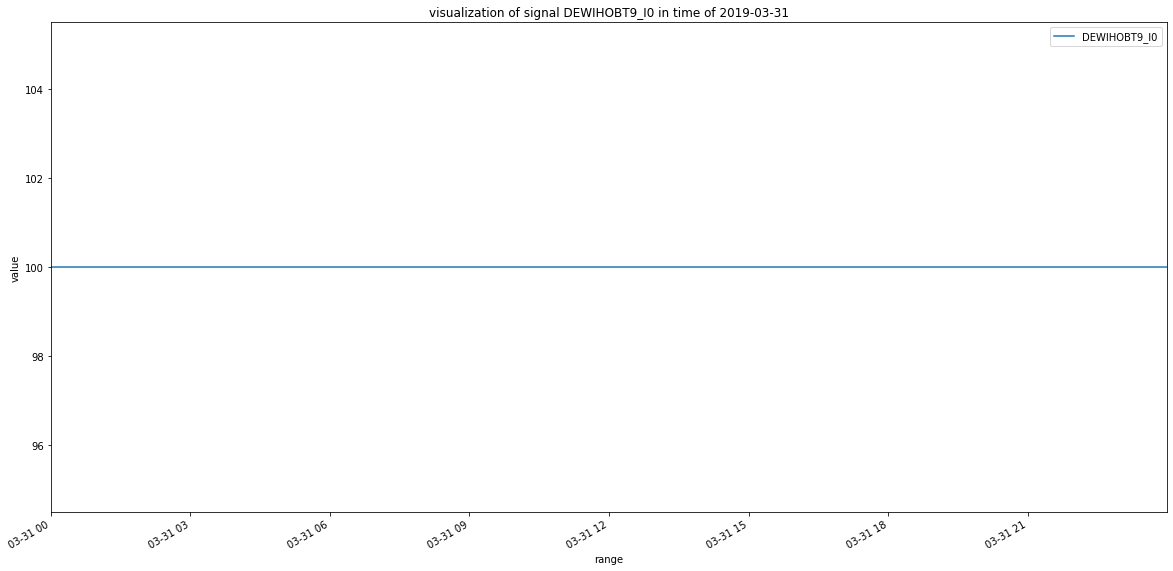

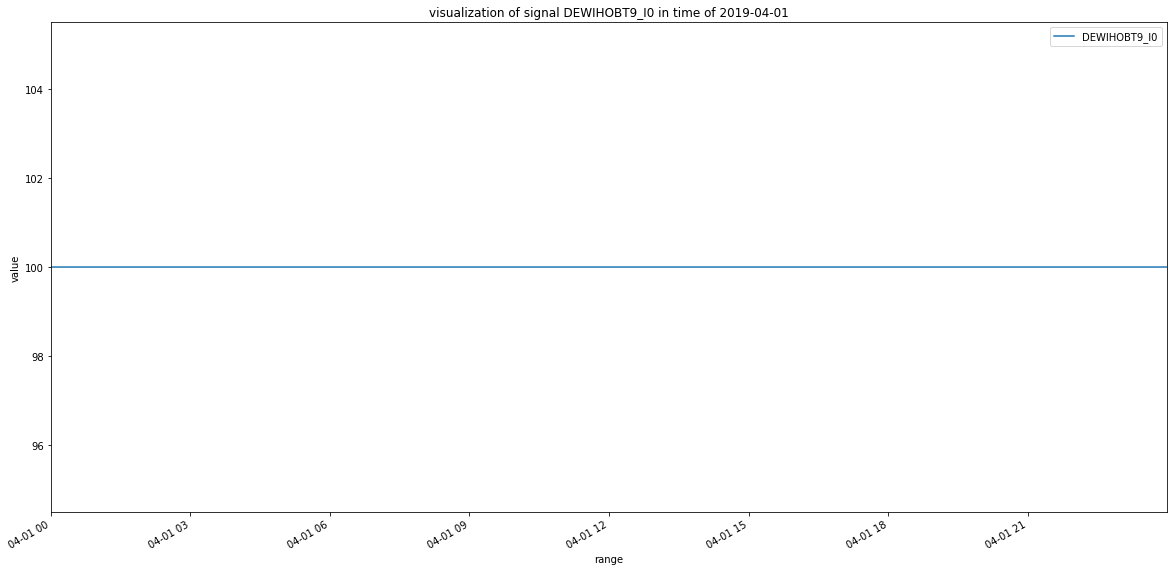

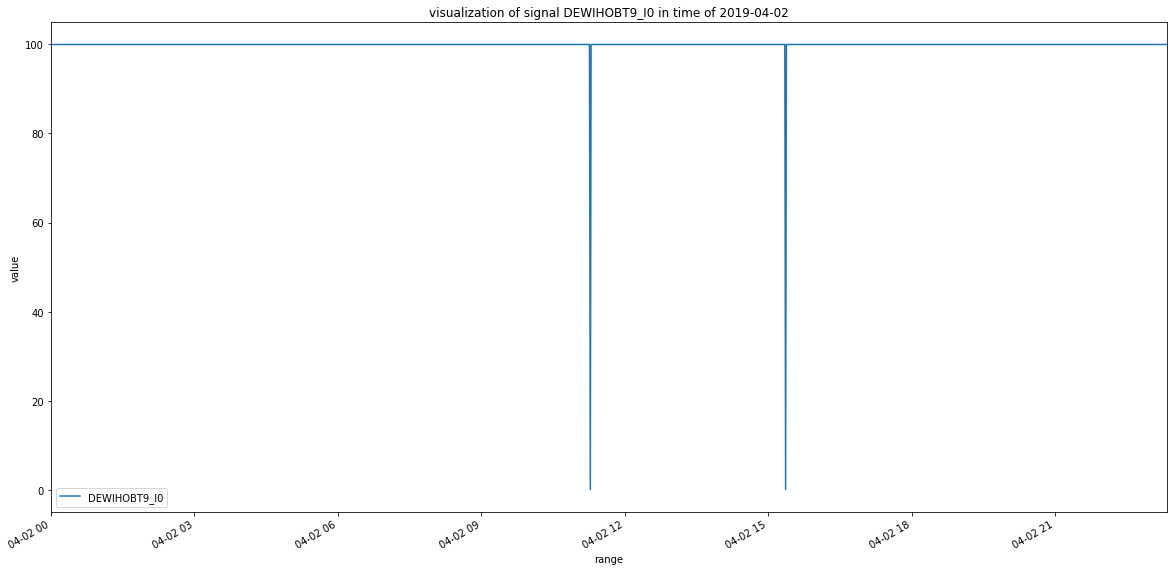

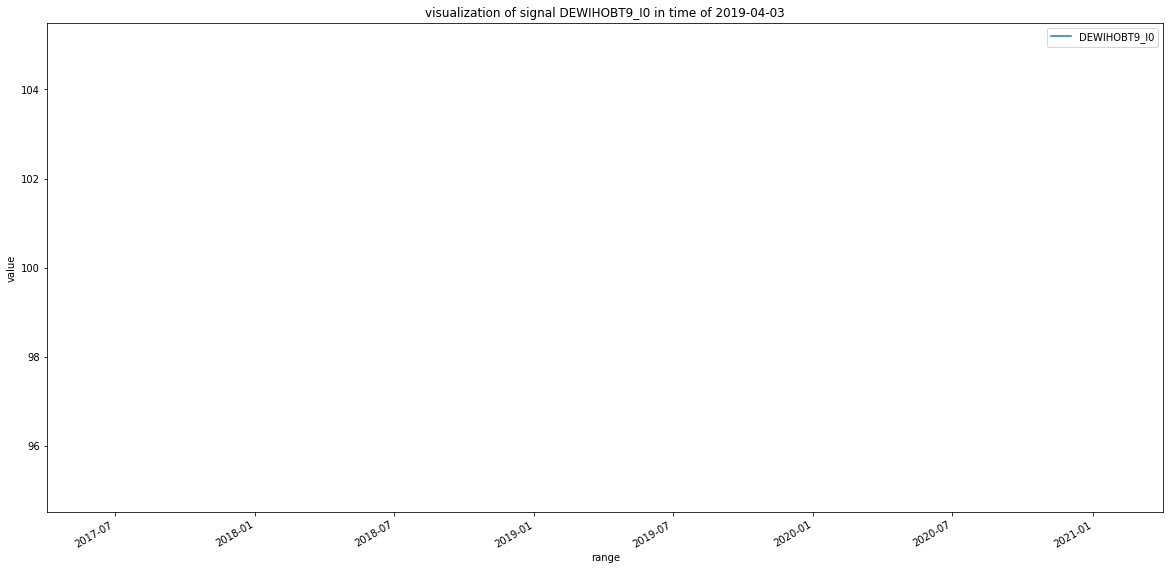

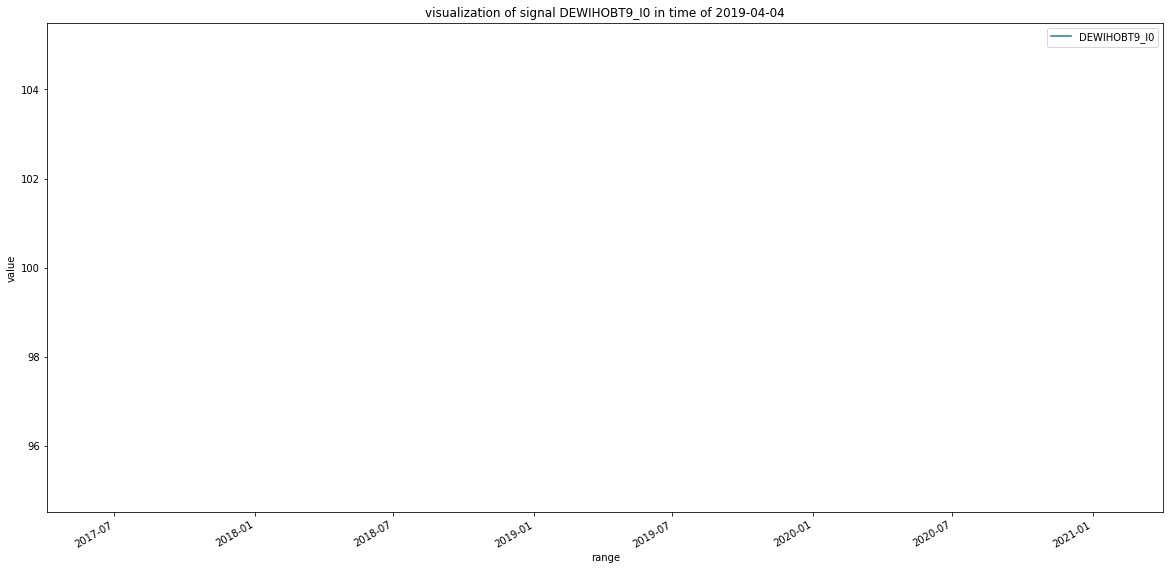

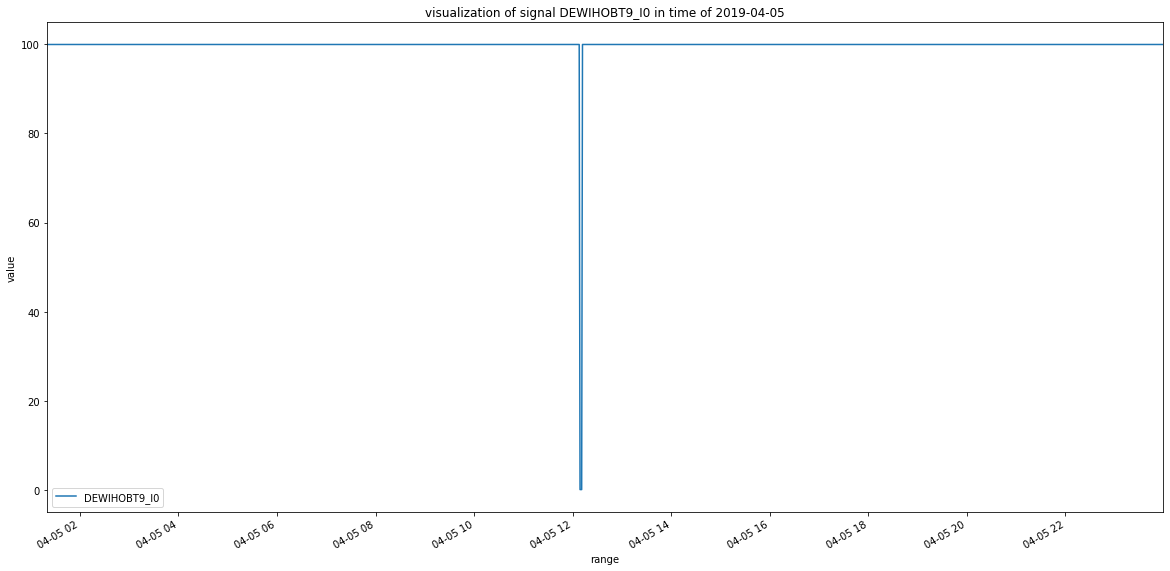

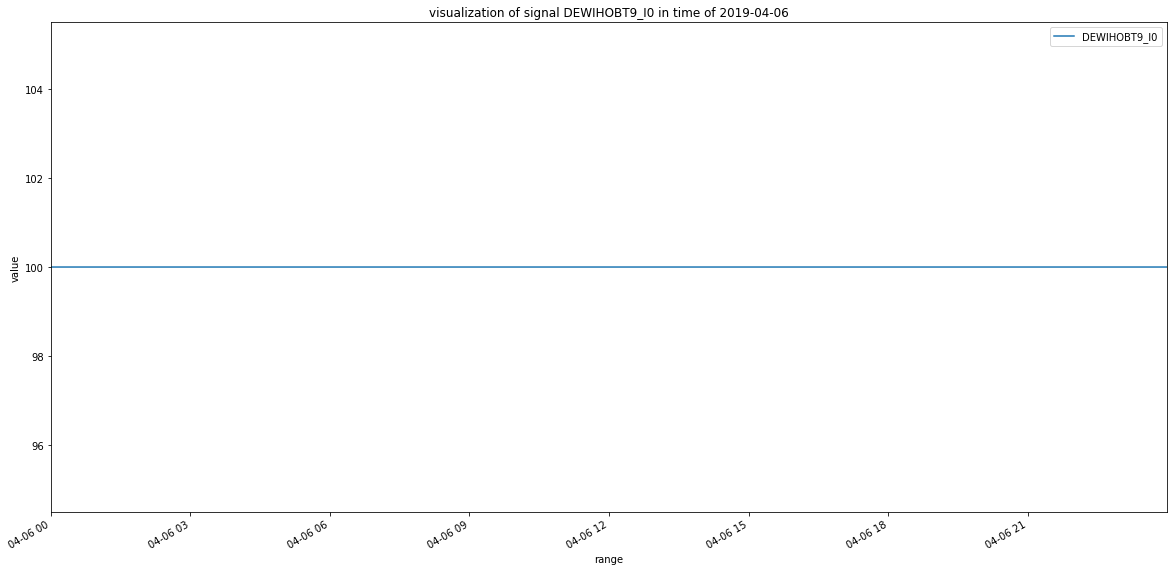

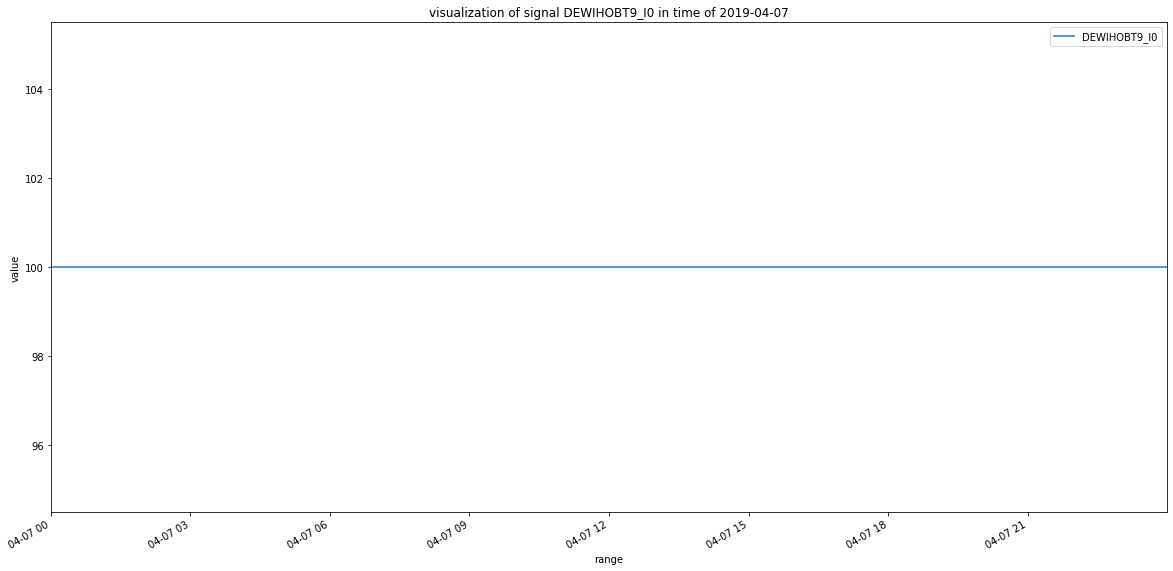

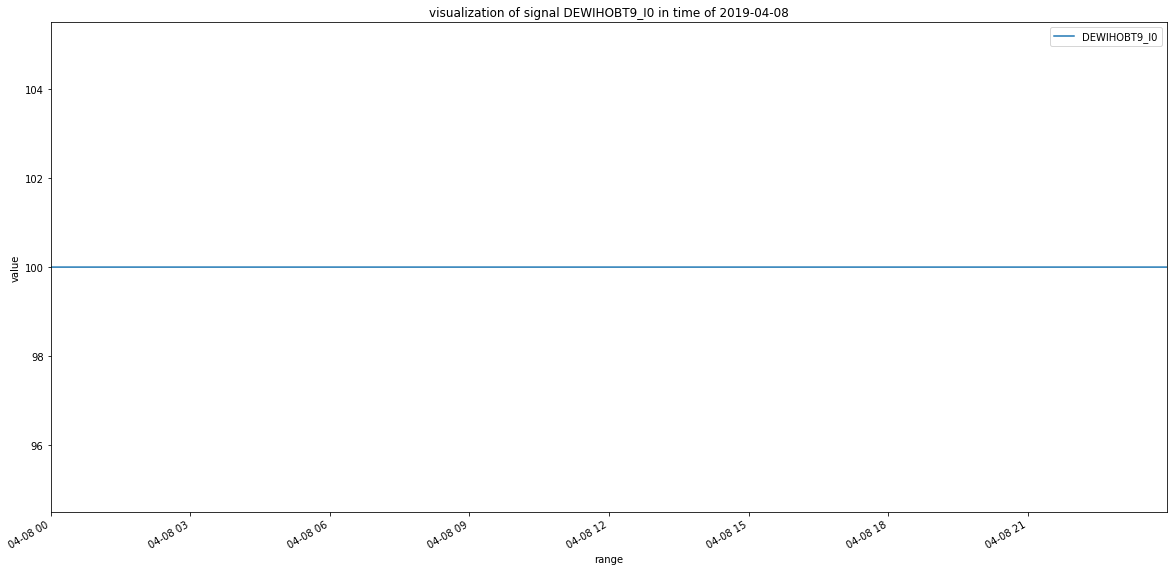

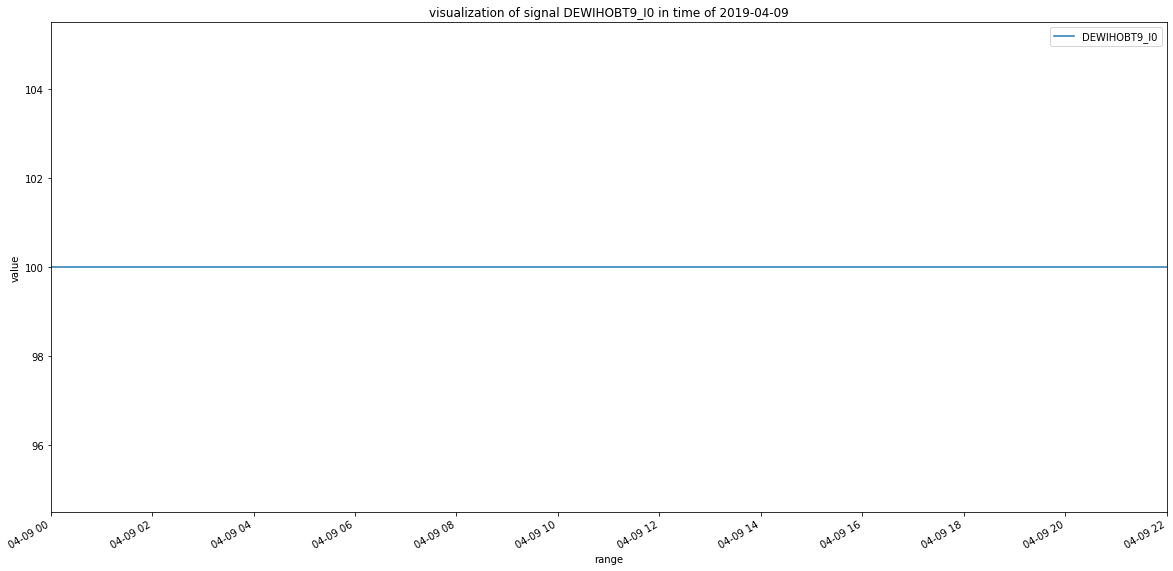

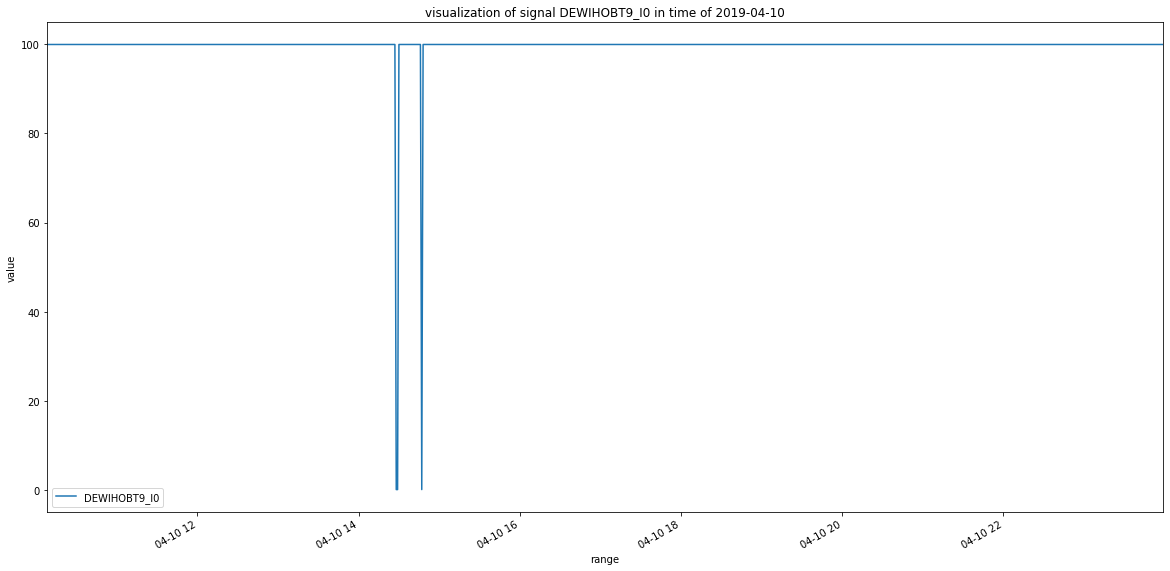

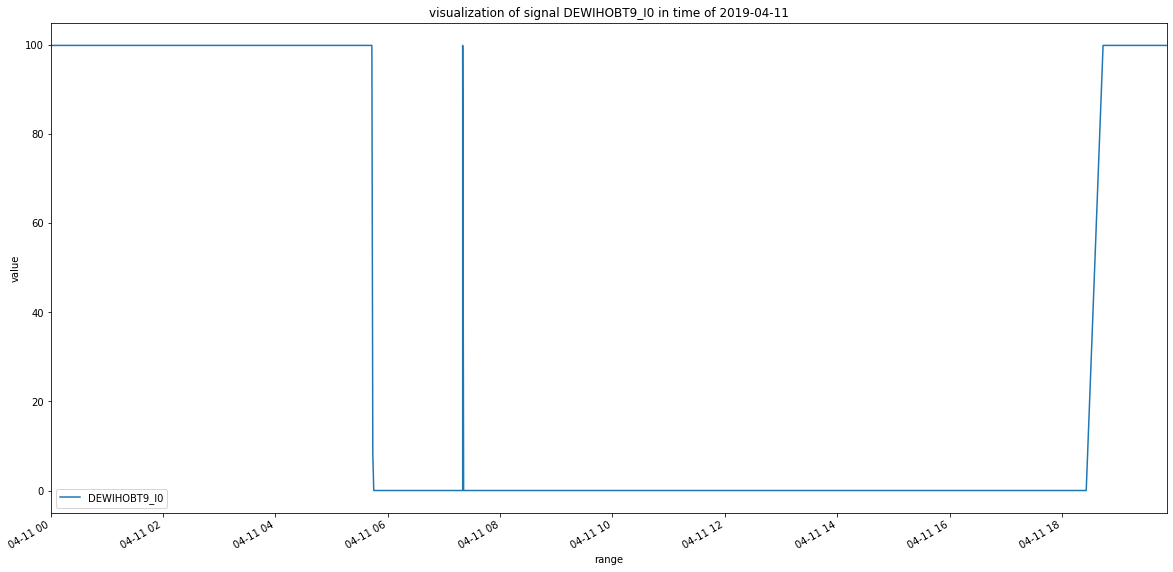

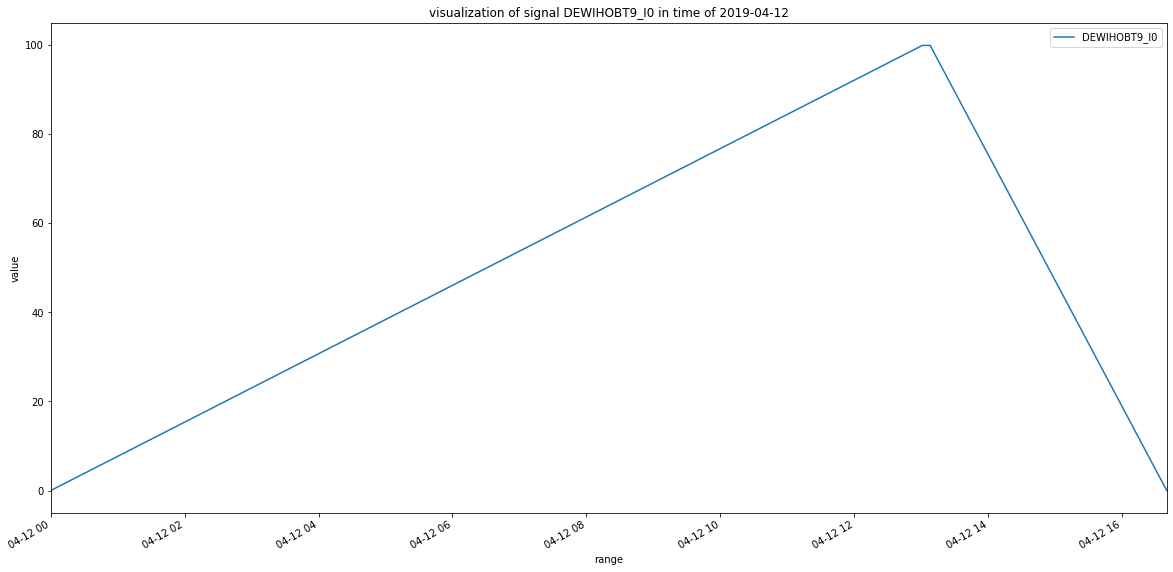

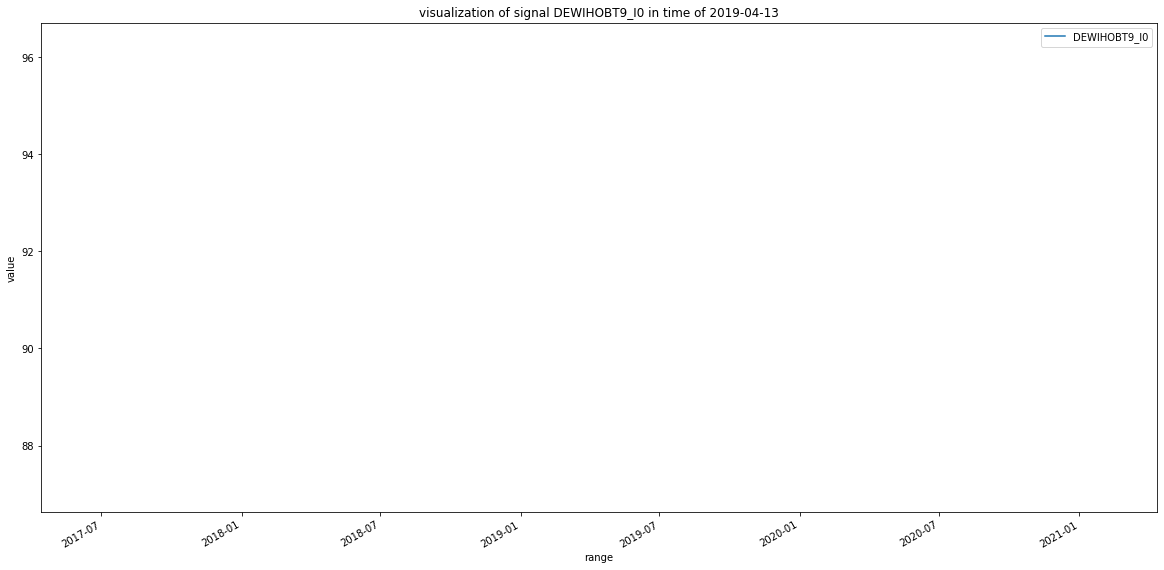

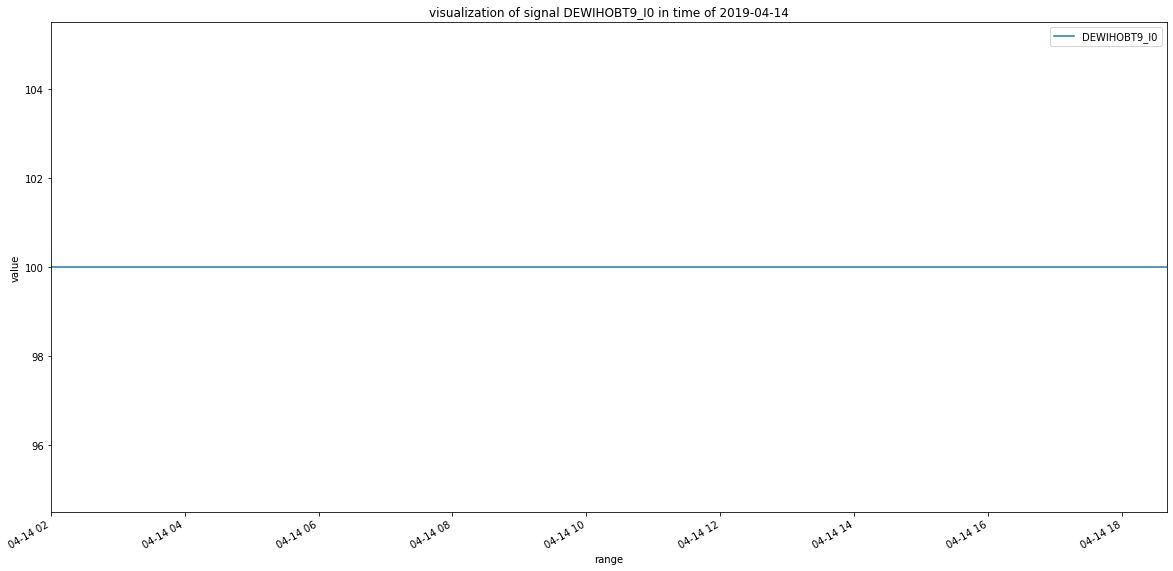

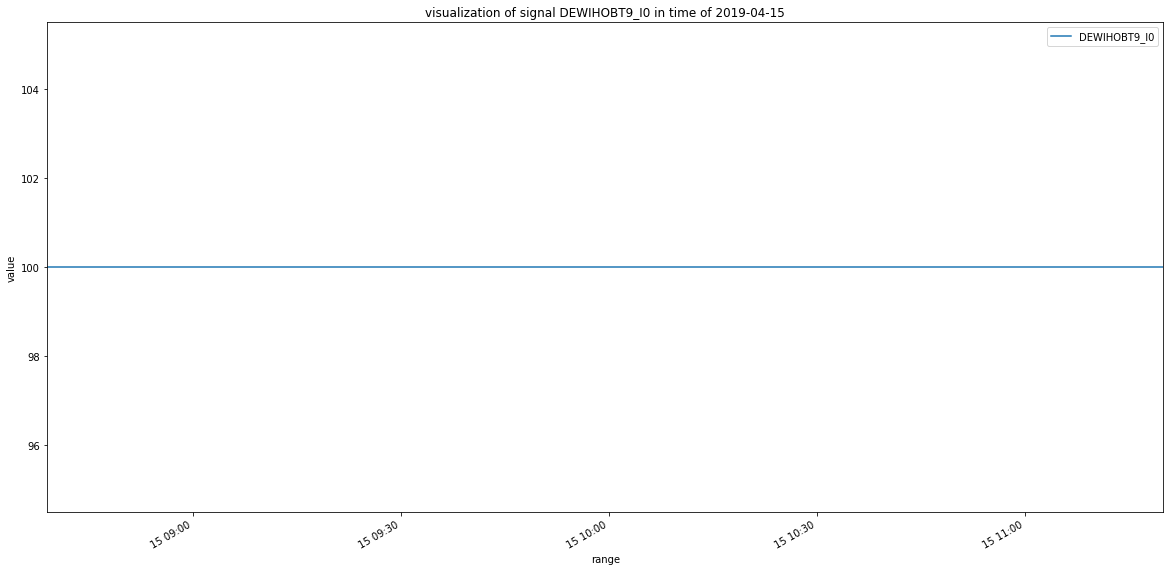

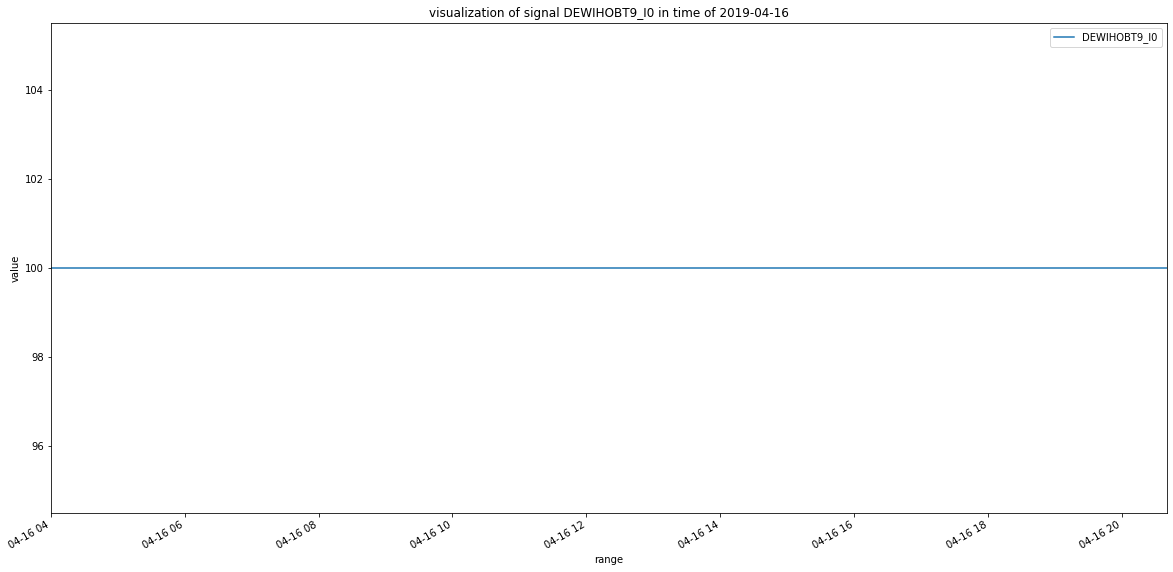

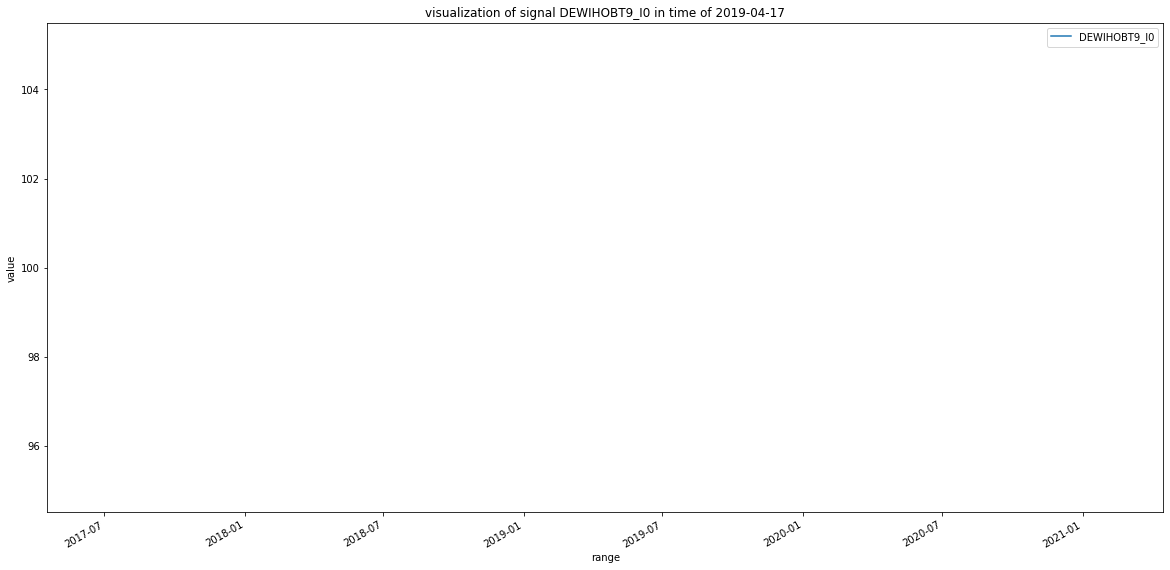

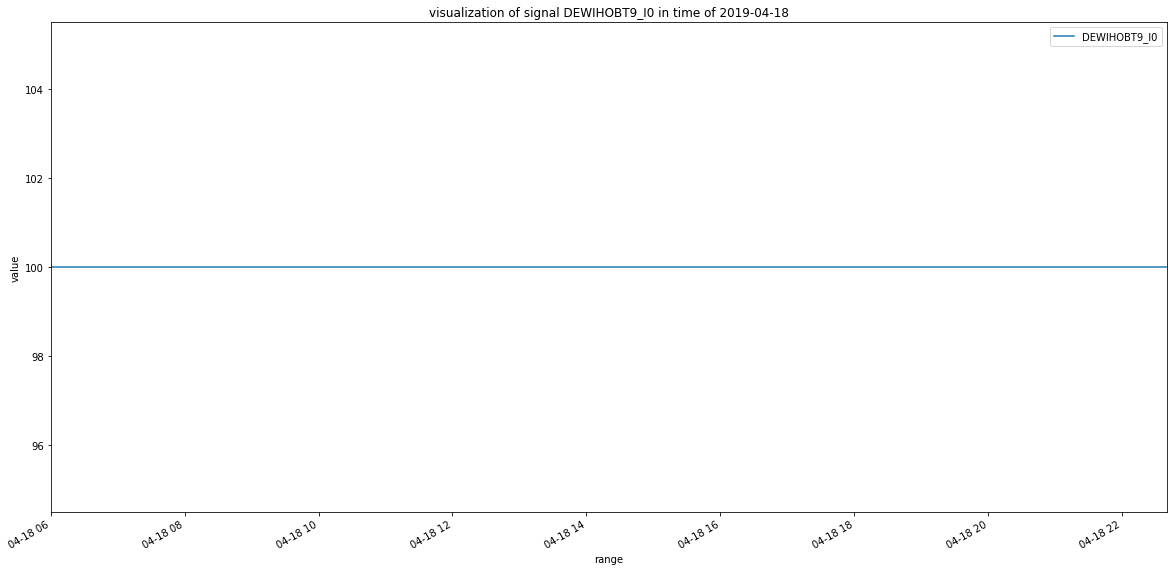

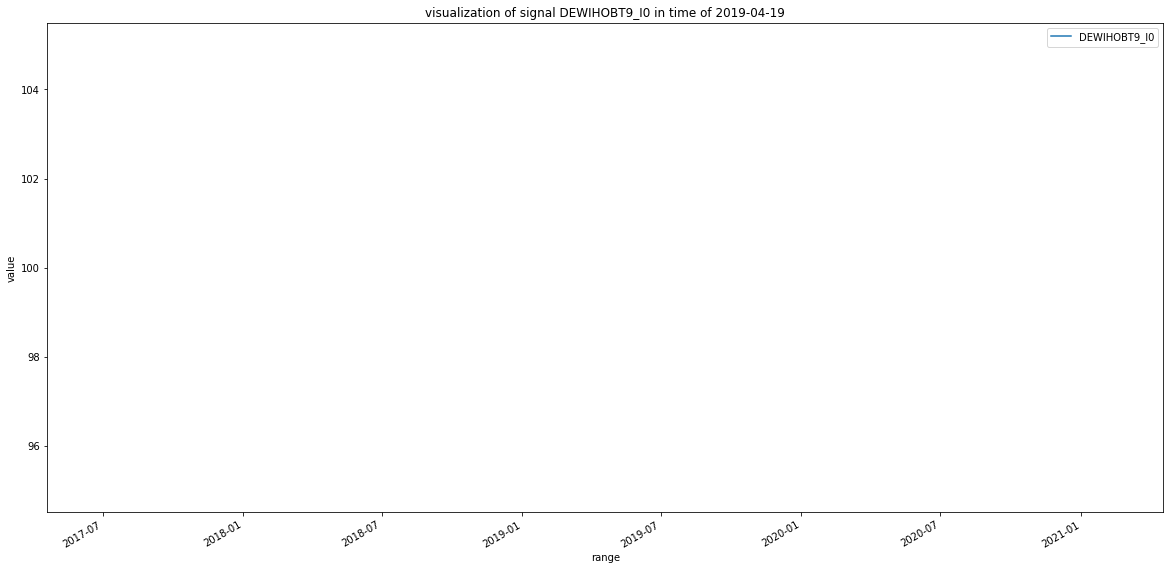

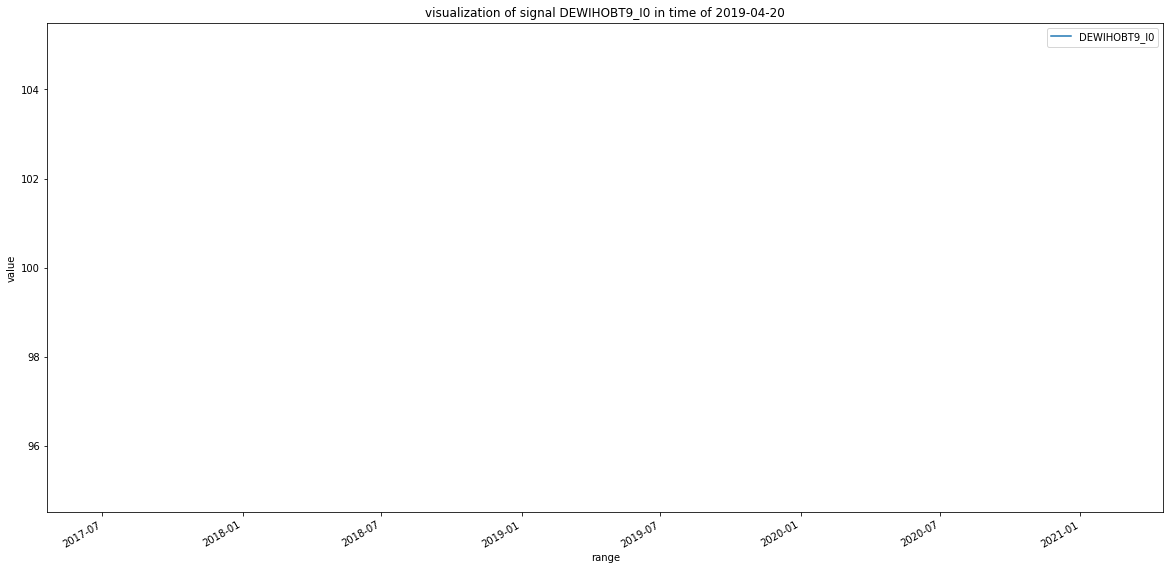

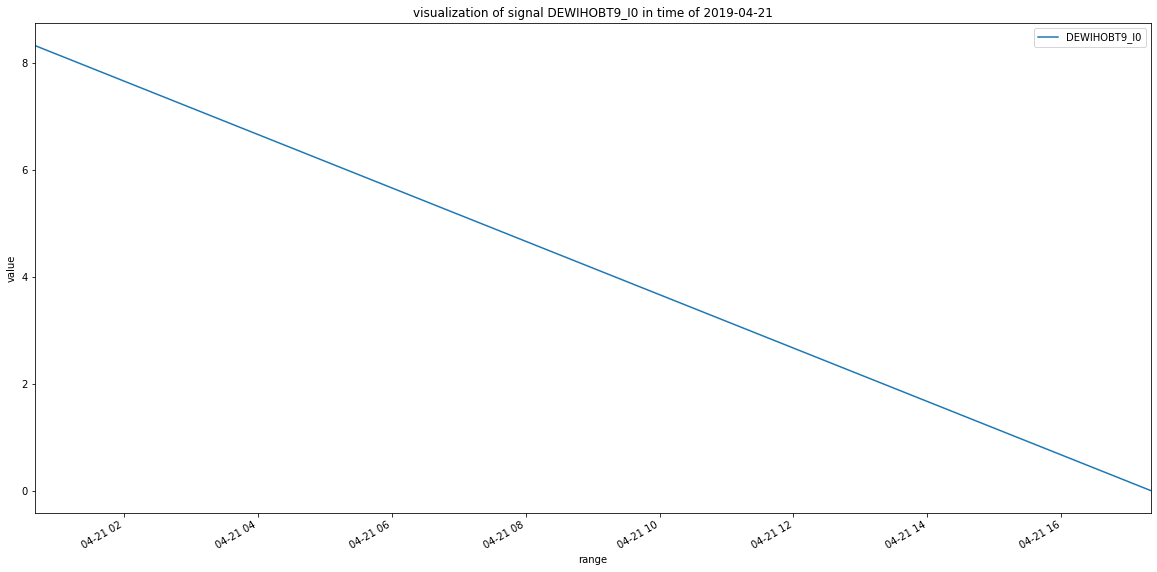

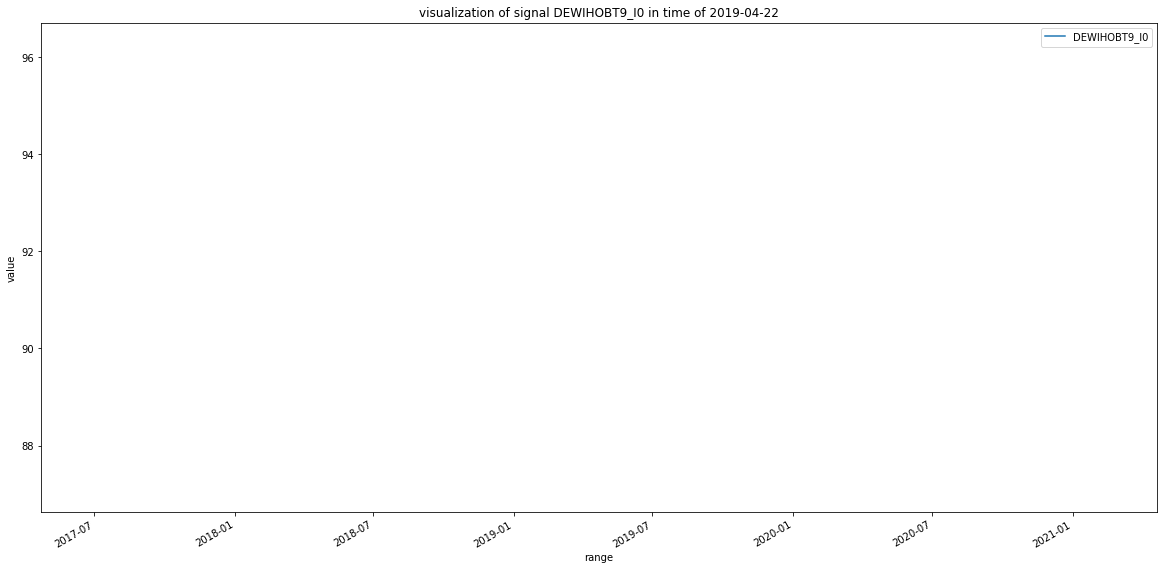

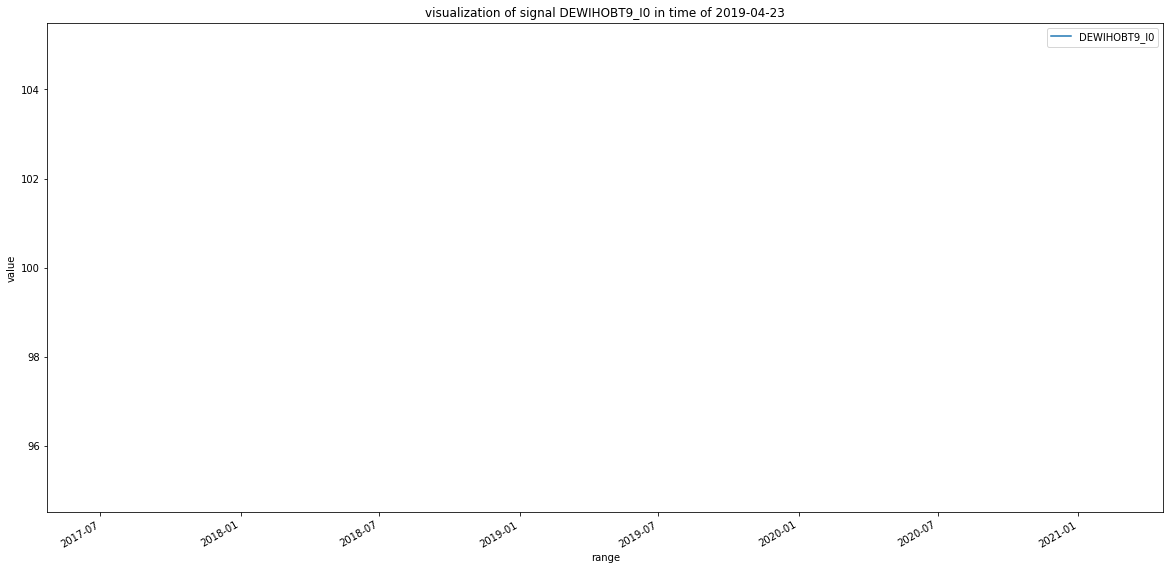

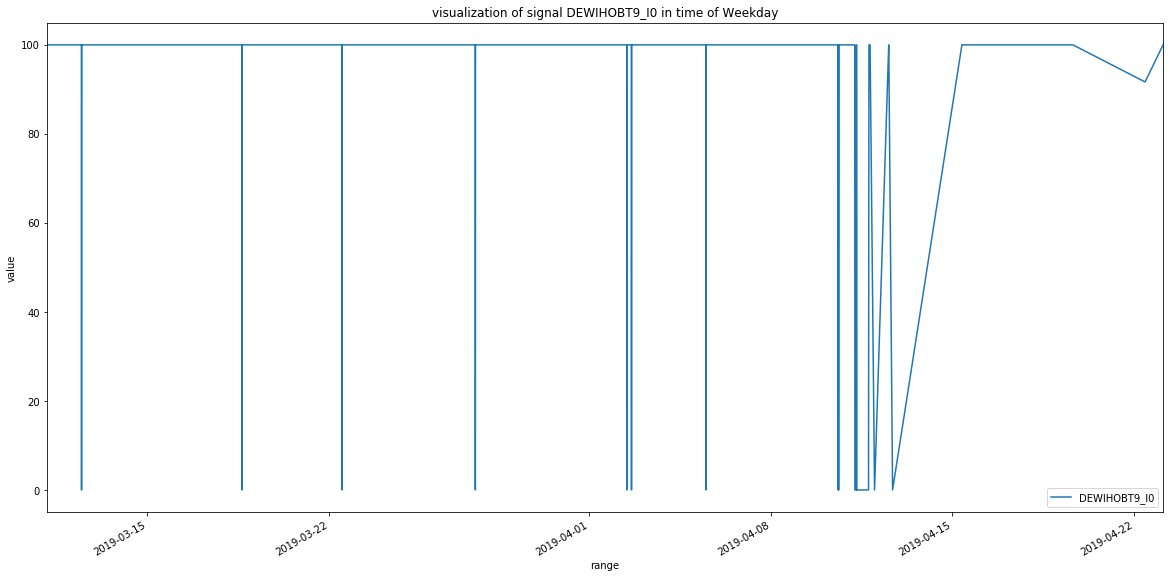

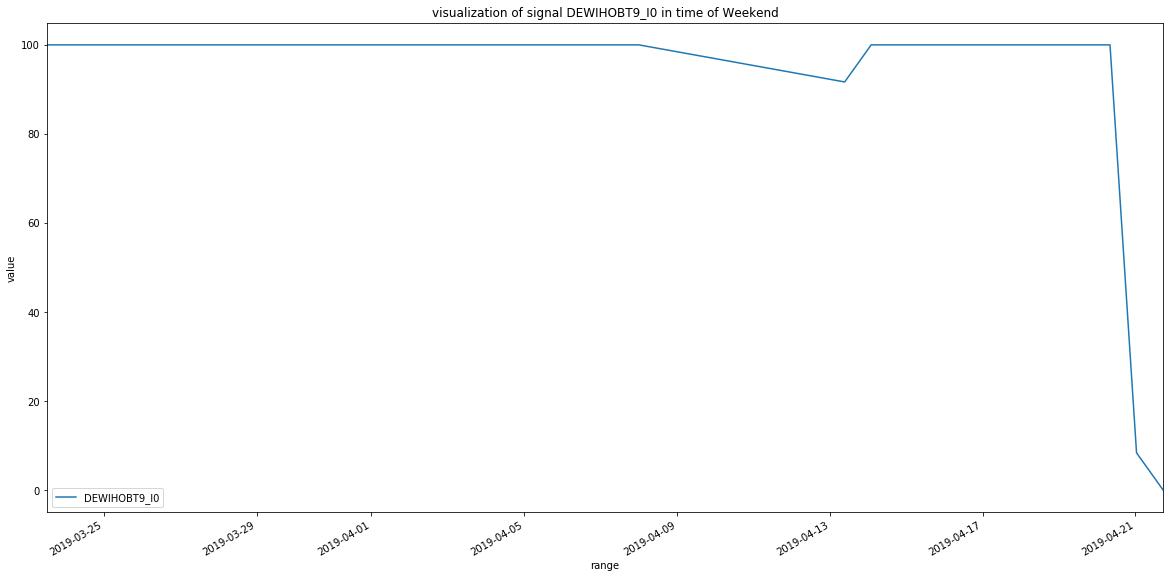

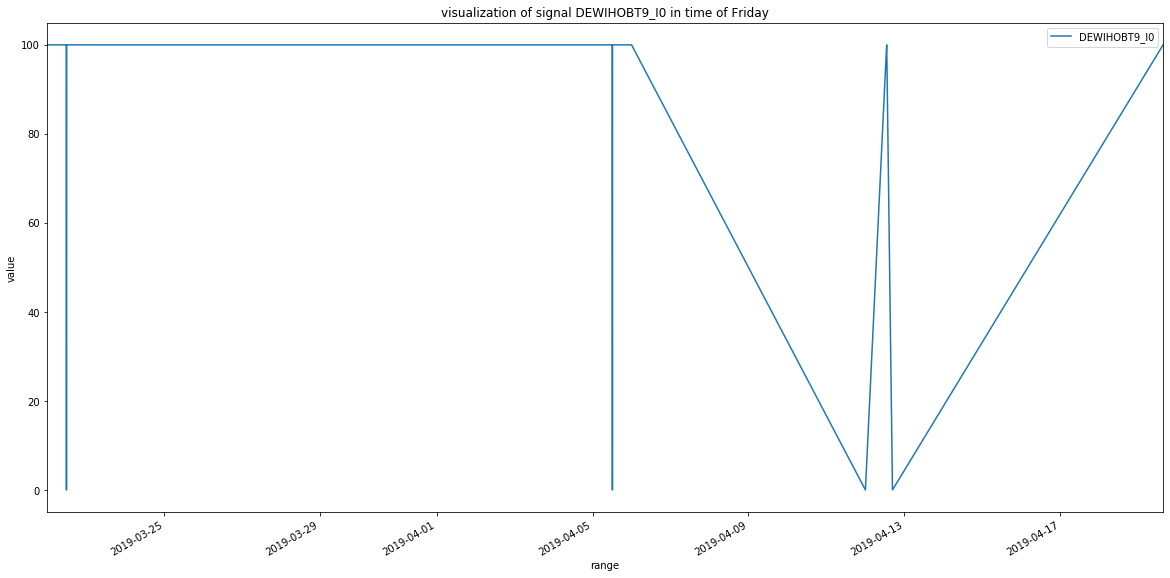

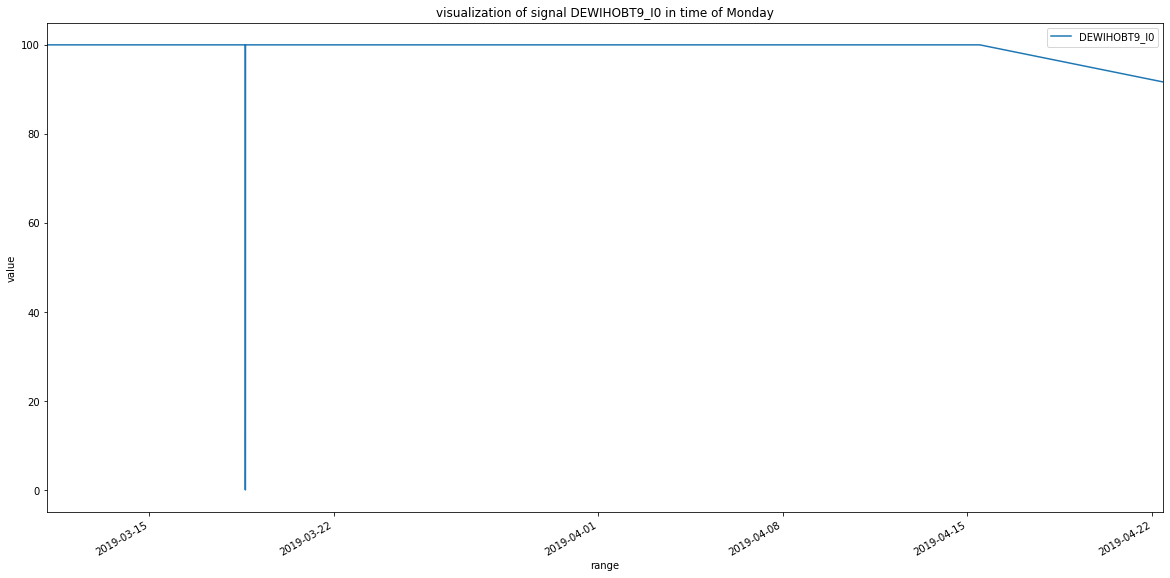

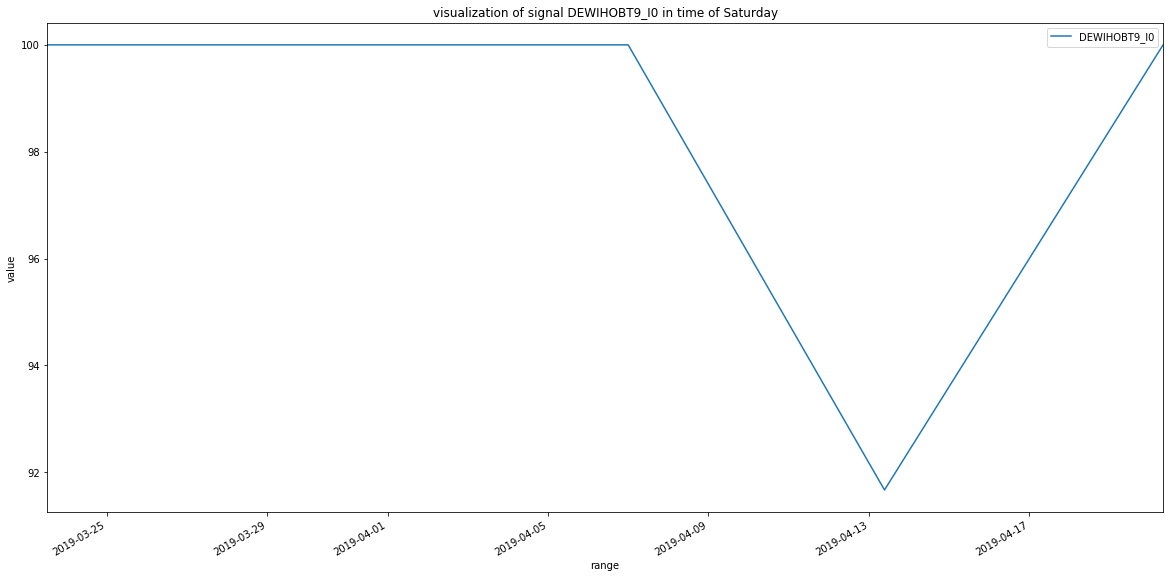

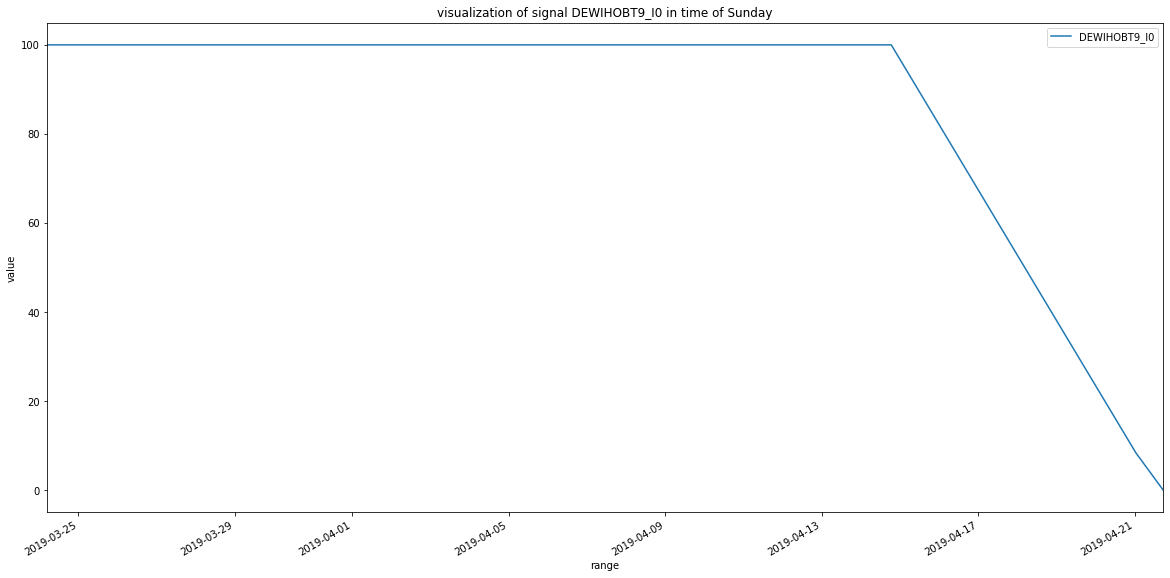

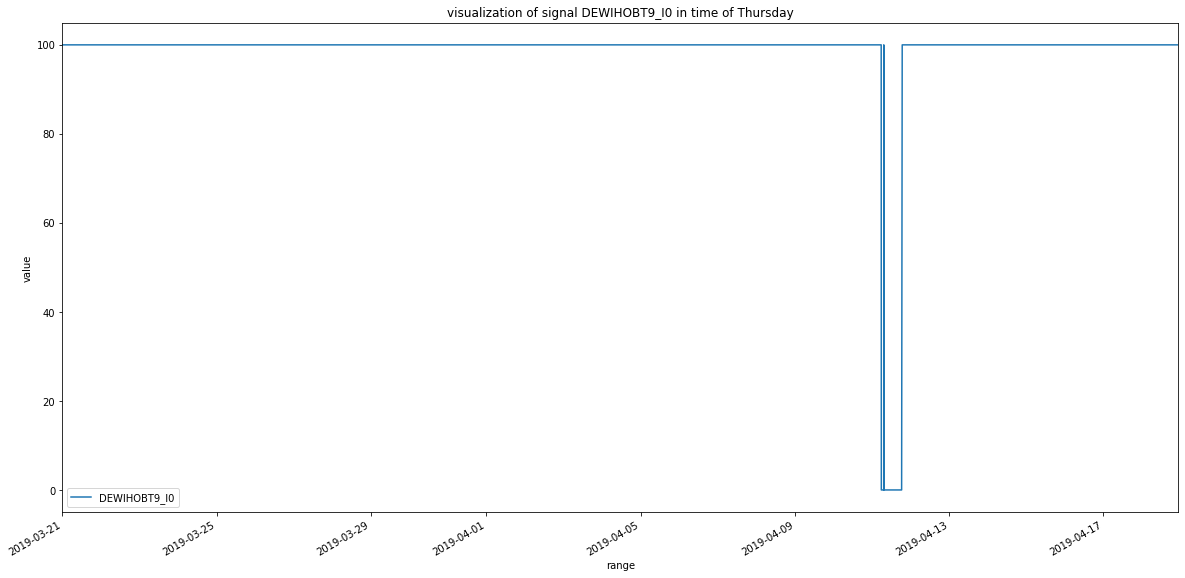

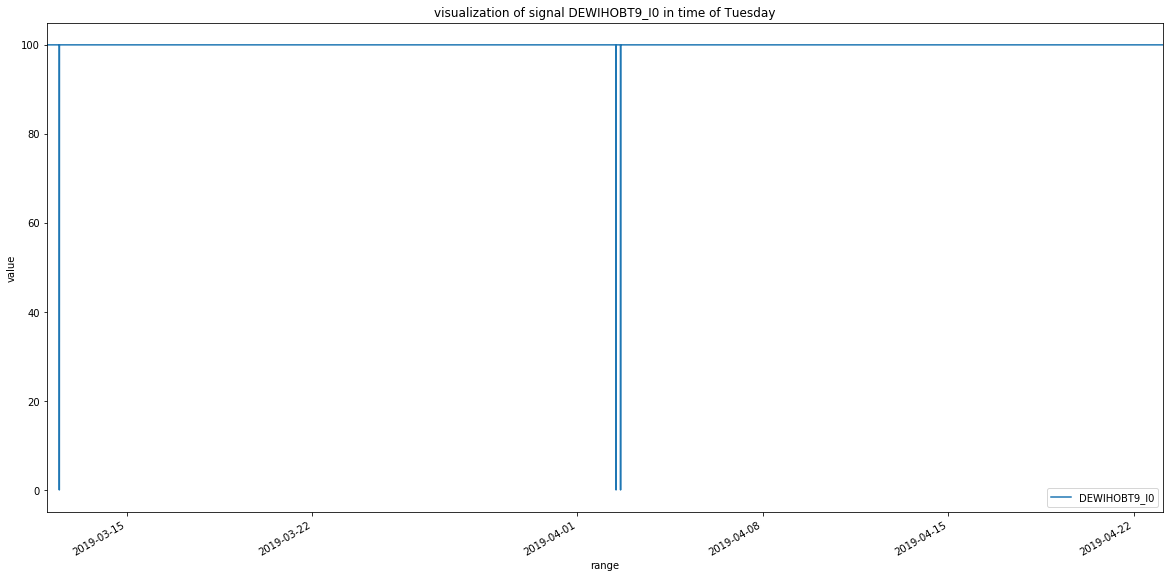

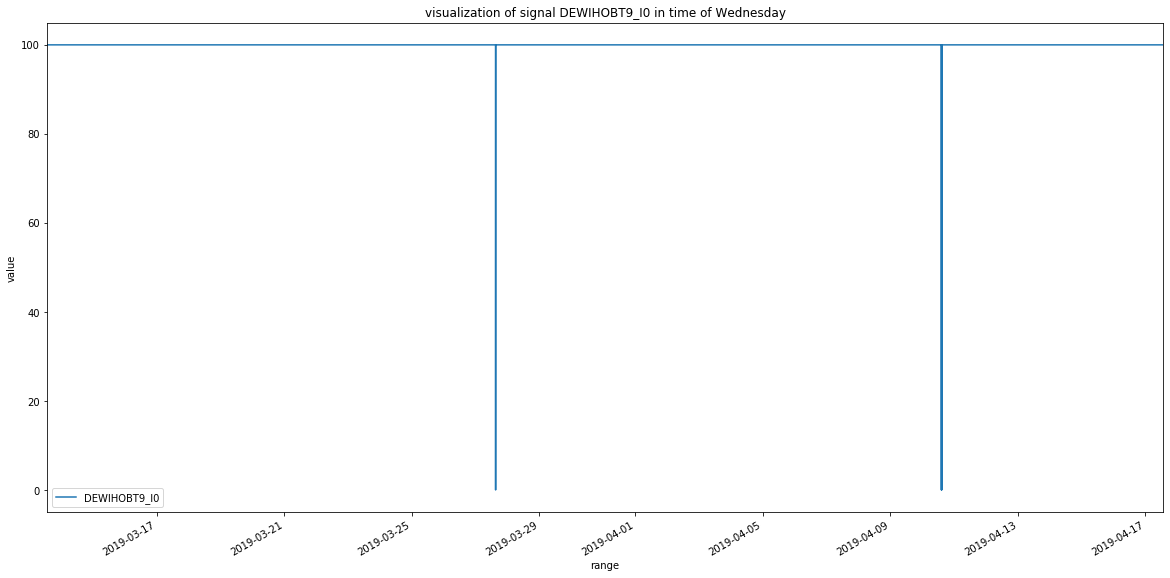

In [23]:
import shutil
def draw_graph(dictionary_value, dictionary,target,path, subfolder_name):
    fig_location = path+'/'+str(subfolder_name)
    
    if not os.path.exists(fig_location):
        os.makedirs(fig_location)
    else:
        shutil.rmtree(fig_location,ignore_errors= True)
        os.makedirs(fig_location)
    for i in dictionary_value:
        value = dictionary[i]
        value.iloc[:].plot(y=[target])
        
        plt.title('visualization of signal '+str(target)+' in time of '+str(i))
        plt.xlabel('range')
        plt.ylabel('value')
        
        plt.rcParams['figure.figsize'] =(20,10)
        plt.savefig(fig_location+'/'+str(i)+'.jpg')
        
target = 'DEWIHOBT9_I0'
draw_graph_date = draw_graph(date_key_value,dict_of_dates, target,final_directory, subfolder_name = 'date_fig_blast_furnace')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target,final_directory, subfolder_name = 'week_fig_blast_furnace')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target,final_directory, subfolder_name = 'day_fig_blast_furnace')